In [ ]:
import argparse
import os
import numpy as np
import math
import sys


import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

cuda = True if torch.cuda.is_available() else False
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim,samples_dim):
        super(Generator, self).__init__()

        def block(in_feat, out_feat, normalize=True):
            layers = [nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim, 50, normalize=False),
            nn.Linear(50, samples_dim)
        )

    def forward(self, z):
        img = self.model(z)
        return img


In [ ]:

class Discriminator(nn.Module):
    def __init__(self, samples_dim):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(samples_dim, 50),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(50, 50),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        validity =self.model(x)#torch.sin(self.model(x))
        # T=nn.Tanh()
       # validity=T(C*x)
        return validity

In [ ]:
def compute_gradient_penalty(D, real_samples, fake_samples):
    """Calculates the gradient penalty loss for WGAN GP"""
    # Random weight term for interpolation between real and fake samples
    alpha =.5# Tensor(np.random.random((real_samples.size(0), 1, 1, 1)))
    # Get random interpolation between real and fake samples
    interpolates = (alpha * real_samples + ((1 - alpha) * fake_samples)).requires_grad_(True)
    #d_interpolates = D(interpolates)
    d_interpolates = D(interpolates)
  #  fake = Variable(Tensor(real_samples.shape[0], 1).fill_(1.0), requires_grad=False)
    # Get gradient w.r.t. interpolates
    gradients = d_interpolates.view(d_interpolates.size(0), -1)
    gradient_penalty = ((gradients.norm(2, dim=1) - 1)).mean()
    return gradient_penalty

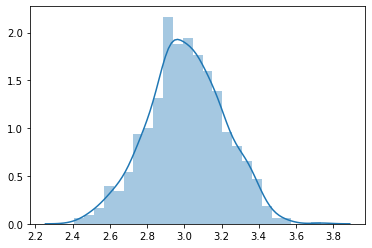

In [18]:
m = torch.distributions.normal.Normal(torch.tensor([3.0]), torch.tensor([.2]))
real_data=m.sample([1000]).to(device)
real_data.shape

sns.distplot(real_data.cpu())

In [33]:
lat_dim=1
samples_dim=1

# Initialize generator and discriminator
generator = Generator(lat_dim,samples_dim)
discriminator = Discriminator(samples_dim)


if cuda:
    generator.cuda()
    discriminator.cuda()


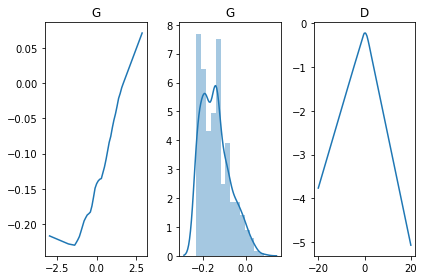

In [34]:

def viewGAN(discriminator, generator):
    fig, ax= plt.subplots(1,3)

    X=torch.arange(-20.,20.,0.1)
    Y=discriminator(X.unsqueeze(1).to(device)).detach().cpu()
    ax[2].plot(X,Y)
    ax[2].title.set_text('D')
    
    Z=torch.arange(-3.,3.,0.1)
    Y=generator(Z.unsqueeze(1).to(device)).detach().cpu()
    ax[0].plot(Z,Y)
    ax[0].title.set_text('G')
    
    


    z = Tensor(np.random.normal(0, 1, (500, lat_dim)))
    fake_data=generator(z).detach().cpu()
    sns.distplot(fake_data, ax=ax[1])
    ax[1].title.set_text('G')
    
    plt.tight_layout()
    plt.show()
viewGAN(discriminator, generator)

In [35]:
b1=0.5 #0.5
b2=0.9999
lr_g=0.009
lr_d=0.001
# Optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=lr_g, betas=(b1, b2))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=lr_d, betas=(b1, b2))





[Epoch 0/10000] [D loss: -1.103532] [G loss: 0.148674]


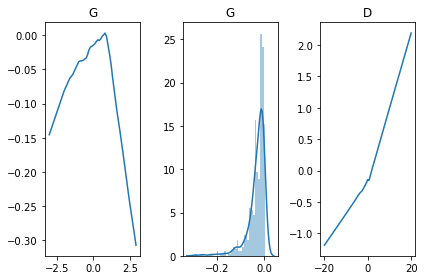

[Epoch 4/10000] [D loss: -1.527156] [G loss: 0.185648]
[Epoch 8/10000] [D loss: -1.956475] [G loss: 0.181929]
[Epoch 12/10000] [D loss: -2.397290] [G loss: 0.111506]
[Epoch 16/10000] [D loss: -2.861654] [G loss: -0.045276]
[Epoch 20/10000] [D loss: -3.214731] [G loss: -0.374817]
[Epoch 24/10000] [D loss: -3.523202] [G loss: -0.889974]
[Epoch 28/10000] [D loss: -3.706709] [G loss: -1.653897]
[Epoch 32/10000] [D loss: -3.867865] [G loss: -2.469297]
[Epoch 36/10000] [D loss: -3.755970] [G loss: -3.668931]
[Epoch 40/10000] [D loss: -3.297987] [G loss: -5.216392]
[Epoch 44/10000] [D loss: -2.850576] [G loss: -6.557054]
[Epoch 48/10000] [D loss: -1.933687] [G loss: -8.098947]
[Epoch 52/10000] [D loss: -1.023200] [G loss: -9.168910]
[Epoch 56/10000] [D loss: 0.093202] [G loss: -9.910819]
[Epoch 60/10000] [D loss: 0.906309] [G loss: -9.897236]
[Epoch 64/10000] [D loss: 1.836375] [G loss: -9.334250]
[Epoch 68/10000] [D loss: 1.995338] [G loss: -8.009513]
[Epoch 72/10000] [D loss: 1.960644] [G l

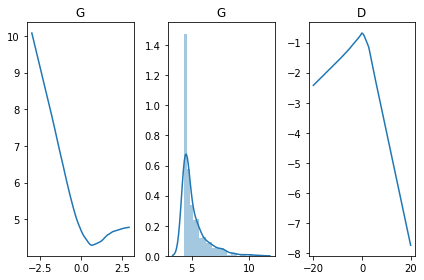

[Epoch 104/10000] [D loss: -1.949194] [G loss: 3.314409]
[Epoch 108/10000] [D loss: -2.307926] [G loss: 4.535028]
[Epoch 112/10000] [D loss: -2.636627] [G loss: 5.835608]
[Epoch 116/10000] [D loss: -2.868100] [G loss: 7.050704]
[Epoch 120/10000] [D loss: -3.170807] [G loss: 8.439224]
[Epoch 124/10000] [D loss: -3.313174] [G loss: 9.536107]
[Epoch 128/10000] [D loss: -3.293417] [G loss: 10.409959]
[Epoch 132/10000] [D loss: -2.738552] [G loss: 10.474358]
[Epoch 136/10000] [D loss: -2.070202] [G loss: 10.244047]
[Epoch 140/10000] [D loss: -1.420022] [G loss: 9.863295]
[Epoch 144/10000] [D loss: -0.493129] [G loss: 8.807458]
[Epoch 148/10000] [D loss: 0.215032] [G loss: 7.646036]
[Epoch 152/10000] [D loss: 0.791358] [G loss: 6.257390]
[Epoch 156/10000] [D loss: 0.969100] [G loss: 5.054078]
[Epoch 160/10000] [D loss: 1.034633] [G loss: 3.879699]
[Epoch 164/10000] [D loss: 0.792197] [G loss: 3.042084]
[Epoch 168/10000] [D loss: 0.340342] [G loss: 2.369189]
[Epoch 172/10000] [D loss: -0.2876

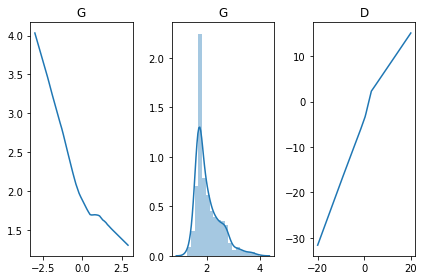

[Epoch 204/10000] [D loss: -2.666343] [G loss: -0.507880]
[Epoch 208/10000] [D loss: -2.511411] [G loss: -1.247455]
[Epoch 212/10000] [D loss: -2.207653] [G loss: -2.012745]
[Epoch 216/10000] [D loss: -1.685476] [G loss: -2.847117]
[Epoch 220/10000] [D loss: -1.191510] [G loss: -3.494746]
[Epoch 224/10000] [D loss: -0.599942] [G loss: -4.110246]
[Epoch 228/10000] [D loss: -0.340072] [G loss: -4.132614]
[Epoch 232/10000] [D loss: -0.191940] [G loss: -3.651798]
[Epoch 236/10000] [D loss: -0.161019] [G loss: -2.905188]
[Epoch 240/10000] [D loss: -0.345317] [G loss: -1.987341]
[Epoch 244/10000] [D loss: -0.569945] [G loss: -1.017450]
[Epoch 248/10000] [D loss: -0.841576] [G loss: -0.061966]
[Epoch 252/10000] [D loss: -1.074149] [G loss: 0.838080]
[Epoch 256/10000] [D loss: -1.204389] [G loss: 1.501466]
[Epoch 260/10000] [D loss: -1.332468] [G loss: 2.146266]
[Epoch 264/10000] [D loss: -1.401379] [G loss: 2.690532]
[Epoch 268/10000] [D loss: -1.516774] [G loss: 3.307339]
[Epoch 272/10000] [

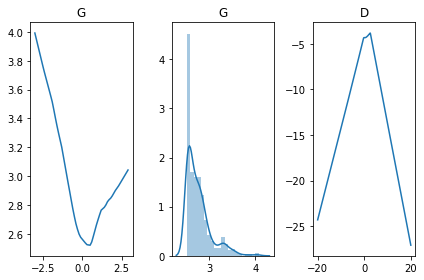

[Epoch 304/10000] [D loss: -0.716615] [G loss: 4.227264]
[Epoch 308/10000] [D loss: -0.918492] [G loss: 4.469817]
[Epoch 312/10000] [D loss: -1.062995] [G loss: 4.189377]
[Epoch 316/10000] [D loss: -1.114636] [G loss: 4.022701]
[Epoch 320/10000] [D loss: -1.168495] [G loss: 3.828370]
[Epoch 324/10000] [D loss: -1.171596] [G loss: 3.696477]
[Epoch 328/10000] [D loss: -1.181950] [G loss: 3.517728]
[Epoch 332/10000] [D loss: -1.134765] [G loss: 3.406147]
[Epoch 336/10000] [D loss: -1.059800] [G loss: 3.267246]
[Epoch 340/10000] [D loss: -1.004097] [G loss: 2.919420]
[Epoch 344/10000] [D loss: -0.977604] [G loss: 2.866291]
[Epoch 348/10000] [D loss: -1.014052] [G loss: 2.782371]
[Epoch 352/10000] [D loss: -1.019152] [G loss: 2.788184]
[Epoch 356/10000] [D loss: -1.014401] [G loss: 2.819277]
[Epoch 360/10000] [D loss: -1.004524] [G loss: 2.827662]
[Epoch 364/10000] [D loss: -0.996572] [G loss: 2.805703]
[Epoch 368/10000] [D loss: -0.990956] [G loss: 2.788823]
[Epoch 372/10000] [D loss: -0.9

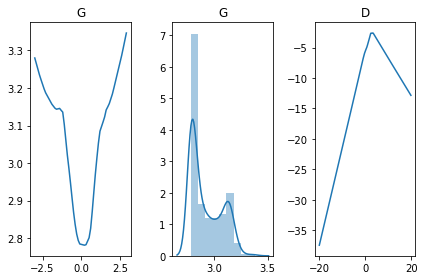

[Epoch 404/10000] [D loss: -0.999051] [G loss: 2.615329]
[Epoch 408/10000] [D loss: -0.998975] [G loss: 2.610283]
[Epoch 412/10000] [D loss: -0.999373] [G loss: 2.613489]
[Epoch 416/10000] [D loss: -0.998137] [G loss: 2.624459]
[Epoch 420/10000] [D loss: -0.999158] [G loss: 2.644682]
[Epoch 424/10000] [D loss: -0.998639] [G loss: 2.668962]
[Epoch 428/10000] [D loss: -0.997618] [G loss: 2.703213]
[Epoch 432/10000] [D loss: -0.999228] [G loss: 2.759728]
[Epoch 436/10000] [D loss: -0.998950] [G loss: 2.747920]
[Epoch 440/10000] [D loss: -0.999465] [G loss: 2.736812]
[Epoch 444/10000] [D loss: -0.998658] [G loss: 2.759495]
[Epoch 448/10000] [D loss: -0.999314] [G loss: 2.745756]
[Epoch 452/10000] [D loss: -0.999576] [G loss: 2.750226]
[Epoch 456/10000] [D loss: -0.997774] [G loss: 2.746810]
[Epoch 460/10000] [D loss: -0.999270] [G loss: 2.746469]
[Epoch 464/10000] [D loss: -0.999750] [G loss: 2.743844]
[Epoch 468/10000] [D loss: -0.999682] [G loss: 2.743944]
[Epoch 472/10000] [D loss: -0.9

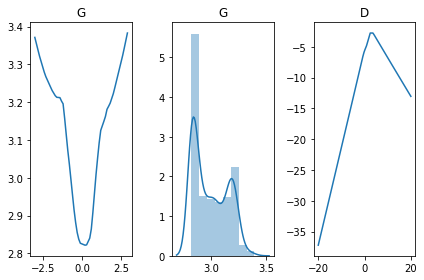

[Epoch 504/10000] [D loss: -0.999634] [G loss: 2.751028]
[Epoch 508/10000] [D loss: -0.999763] [G loss: 2.746867]
[Epoch 512/10000] [D loss: -0.999734] [G loss: 2.736090]
[Epoch 516/10000] [D loss: -0.999898] [G loss: 2.758354]
[Epoch 520/10000] [D loss: -0.999949] [G loss: 2.754817]
[Epoch 524/10000] [D loss: -0.999711] [G loss: 2.750775]
[Epoch 528/10000] [D loss: -0.999648] [G loss: 2.737561]
[Epoch 532/10000] [D loss: -0.999467] [G loss: 2.758630]
[Epoch 536/10000] [D loss: -0.999930] [G loss: 2.754691]
[Epoch 540/10000] [D loss: -0.999850] [G loss: 2.748726]
[Epoch 544/10000] [D loss: -0.999976] [G loss: 2.760442]
[Epoch 548/10000] [D loss: -0.999908] [G loss: 2.752773]
[Epoch 552/10000] [D loss: -0.999865] [G loss: 2.754074]
[Epoch 556/10000] [D loss: -0.999861] [G loss: 2.749591]
[Epoch 560/10000] [D loss: -0.999816] [G loss: 2.756404]
[Epoch 564/10000] [D loss: -0.999717] [G loss: 2.744926]
[Epoch 568/10000] [D loss: -0.999818] [G loss: 2.745129]
[Epoch 572/10000] [D loss: -0.9

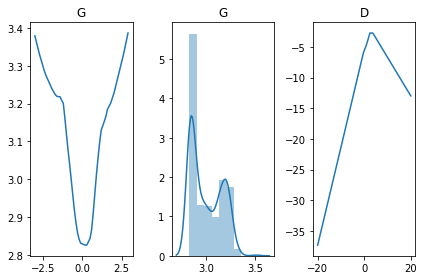

[Epoch 604/10000] [D loss: -0.999564] [G loss: 2.751753]
[Epoch 608/10000] [D loss: -0.999766] [G loss: 2.739471]
[Epoch 612/10000] [D loss: -0.999930] [G loss: 2.752494]
[Epoch 616/10000] [D loss: -0.999784] [G loss: 2.745101]
[Epoch 620/10000] [D loss: -0.999845] [G loss: 2.753066]
[Epoch 624/10000] [D loss: -0.999745] [G loss: 2.745140]
[Epoch 628/10000] [D loss: -0.999947] [G loss: 2.755490]
[Epoch 632/10000] [D loss: -0.999641] [G loss: 2.745755]
[Epoch 636/10000] [D loss: -0.999972] [G loss: 2.752376]
[Epoch 640/10000] [D loss: -0.999572] [G loss: 2.757570]
[Epoch 644/10000] [D loss: -0.999897] [G loss: 2.753159]
[Epoch 648/10000] [D loss: -0.999871] [G loss: 2.749976]
[Epoch 652/10000] [D loss: -0.999447] [G loss: 2.746753]
[Epoch 656/10000] [D loss: -0.999966] [G loss: 2.758435]
[Epoch 660/10000] [D loss: -0.999944] [G loss: 2.755894]
[Epoch 664/10000] [D loss: -0.999776] [G loss: 2.749701]
[Epoch 668/10000] [D loss: -0.999841] [G loss: 2.738827]
[Epoch 672/10000] [D loss: -0.9

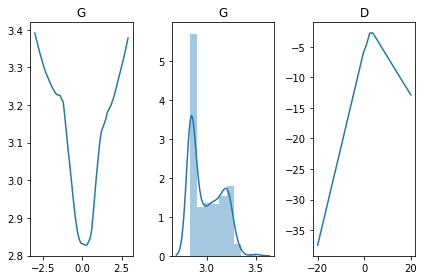

[Epoch 704/10000] [D loss: -0.999921] [G loss: 2.758219]
[Epoch 708/10000] [D loss: -0.999854] [G loss: 2.756808]
[Epoch 712/10000] [D loss: -0.999785] [G loss: 2.750993]
[Epoch 716/10000] [D loss: -0.999812] [G loss: 2.741114]
[Epoch 720/10000] [D loss: -0.999903] [G loss: 2.753348]
[Epoch 724/10000] [D loss: -0.999961] [G loss: 2.760366]
[Epoch 728/10000] [D loss: -0.999903] [G loss: 2.760224]
[Epoch 732/10000] [D loss: -0.999952] [G loss: 2.763555]
[Epoch 736/10000] [D loss: -0.999949] [G loss: 2.758996]
[Epoch 740/10000] [D loss: -0.999786] [G loss: 2.749519]
[Epoch 744/10000] [D loss: -0.999749] [G loss: 2.745935]
[Epoch 748/10000] [D loss: -0.999909] [G loss: 2.757594]
[Epoch 752/10000] [D loss: -0.999837] [G loss: 2.764676]
[Epoch 756/10000] [D loss: -0.999889] [G loss: 2.754788]
[Epoch 760/10000] [D loss: -0.999499] [G loss: 2.761938]
[Epoch 764/10000] [D loss: -0.999701] [G loss: 2.748373]
[Epoch 768/10000] [D loss: -0.999496] [G loss: 2.743748]
[Epoch 772/10000] [D loss: -0.9

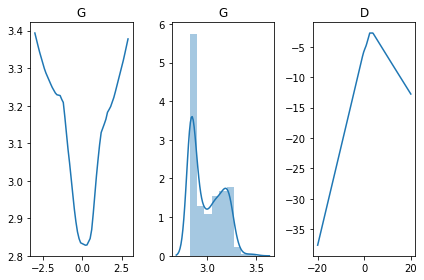

[Epoch 804/10000] [D loss: -0.999767] [G loss: 2.750686]
[Epoch 808/10000] [D loss: -0.999782] [G loss: 2.752461]
[Epoch 812/10000] [D loss: -0.999934] [G loss: 2.762049]
[Epoch 816/10000] [D loss: -0.999889] [G loss: 2.756861]
[Epoch 820/10000] [D loss: -0.999961] [G loss: 2.744462]
[Epoch 824/10000] [D loss: -0.999849] [G loss: 2.745222]
[Epoch 828/10000] [D loss: -0.999818] [G loss: 2.741912]
[Epoch 832/10000] [D loss: -0.999759] [G loss: 2.756669]
[Epoch 836/10000] [D loss: -0.999929] [G loss: 2.767611]
[Epoch 840/10000] [D loss: -0.999917] [G loss: 2.744855]
[Epoch 844/10000] [D loss: -0.999992] [G loss: 2.741211]
[Epoch 848/10000] [D loss: -0.999994] [G loss: 2.764694]
[Epoch 852/10000] [D loss: -0.999867] [G loss: 2.766782]
[Epoch 856/10000] [D loss: -0.999749] [G loss: 2.751852]
[Epoch 860/10000] [D loss: -0.999843] [G loss: 2.744072]
[Epoch 864/10000] [D loss: -0.999935] [G loss: 2.745452]
[Epoch 868/10000] [D loss: -0.999803] [G loss: 2.748428]
[Epoch 872/10000] [D loss: -0.9

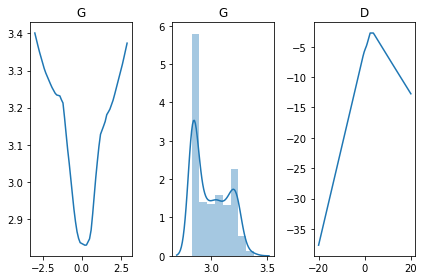

[Epoch 904/10000] [D loss: -0.999994] [G loss: 2.756480]
[Epoch 908/10000] [D loss: -0.999859] [G loss: 2.749739]
[Epoch 912/10000] [D loss: -0.999909] [G loss: 2.756318]
[Epoch 916/10000] [D loss: -0.999979] [G loss: 2.740728]
[Epoch 920/10000] [D loss: -0.999890] [G loss: 2.757200]
[Epoch 924/10000] [D loss: -0.999878] [G loss: 2.753367]
[Epoch 928/10000] [D loss: -0.999799] [G loss: 2.749875]
[Epoch 932/10000] [D loss: -0.999736] [G loss: 2.747070]
[Epoch 936/10000] [D loss: -0.999856] [G loss: 2.749657]
[Epoch 940/10000] [D loss: -0.999809] [G loss: 2.745453]
[Epoch 944/10000] [D loss: -0.999663] [G loss: 2.743218]
[Epoch 948/10000] [D loss: -0.999659] [G loss: 2.750365]
[Epoch 952/10000] [D loss: -0.999687] [G loss: 2.746907]
[Epoch 956/10000] [D loss: -0.999887] [G loss: 2.756591]
[Epoch 960/10000] [D loss: -0.999796] [G loss: 2.750460]
[Epoch 964/10000] [D loss: -0.999943] [G loss: 2.753872]
[Epoch 968/10000] [D loss: -0.999911] [G loss: 2.753751]
[Epoch 972/10000] [D loss: -0.9

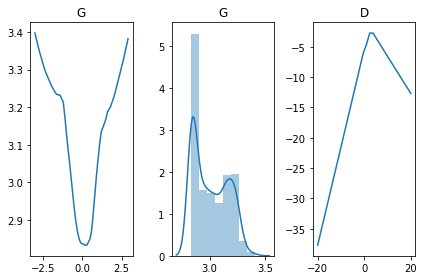

[Epoch 1004/10000] [D loss: -0.999915] [G loss: 2.749957]
[Epoch 1008/10000] [D loss: -0.999975] [G loss: 2.748175]
[Epoch 1012/10000] [D loss: -0.999841] [G loss: 2.745908]
[Epoch 1016/10000] [D loss: -0.999919] [G loss: 2.746201]
[Epoch 1020/10000] [D loss: -0.999751] [G loss: 2.755693]
[Epoch 1024/10000] [D loss: -0.999654] [G loss: 2.764831]
[Epoch 1028/10000] [D loss: -0.999888] [G loss: 2.749285]
[Epoch 1032/10000] [D loss: -0.999974] [G loss: 2.761142]
[Epoch 1036/10000] [D loss: -0.999925] [G loss: 2.769141]
[Epoch 1040/10000] [D loss: -0.999690] [G loss: 2.742210]
[Epoch 1044/10000] [D loss: -0.999830] [G loss: 2.756458]
[Epoch 1048/10000] [D loss: -0.999855] [G loss: 2.774091]
[Epoch 1052/10000] [D loss: -0.999920] [G loss: 2.753061]
[Epoch 1056/10000] [D loss: -0.999817] [G loss: 2.747098]
[Epoch 1060/10000] [D loss: -0.999989] [G loss: 2.745938]
[Epoch 1064/10000] [D loss: -0.999894] [G loss: 2.755901]
[Epoch 1068/10000] [D loss: -0.999862] [G loss: 2.755857]
[Epoch 1072/10

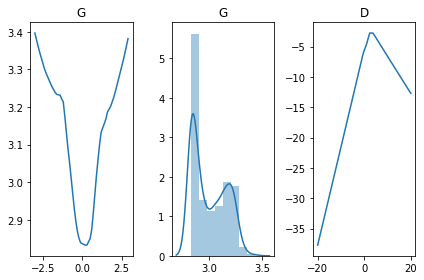

[Epoch 1104/10000] [D loss: -0.999915] [G loss: 2.744030]
[Epoch 1108/10000] [D loss: -0.999718] [G loss: 2.764102]
[Epoch 1112/10000] [D loss: -0.999815] [G loss: 2.756985]
[Epoch 1116/10000] [D loss: -0.999964] [G loss: 2.759920]
[Epoch 1120/10000] [D loss: -0.999969] [G loss: 2.765689]
[Epoch 1124/10000] [D loss: -0.999999] [G loss: 2.742979]
[Epoch 1128/10000] [D loss: -0.999802] [G loss: 2.740802]
[Epoch 1132/10000] [D loss: -0.999985] [G loss: 2.732773]
[Epoch 1136/10000] [D loss: -0.999525] [G loss: 2.764081]
[Epoch 1140/10000] [D loss: -0.999935] [G loss: 2.759629]
[Epoch 1144/10000] [D loss: -0.999945] [G loss: 2.753406]
[Epoch 1148/10000] [D loss: -0.999552] [G loss: 2.760785]
[Epoch 1152/10000] [D loss: -0.999745] [G loss: 2.751792]
[Epoch 1156/10000] [D loss: -0.999871] [G loss: 2.751910]
[Epoch 1160/10000] [D loss: -0.999994] [G loss: 2.731129]
[Epoch 1164/10000] [D loss: -0.999709] [G loss: 2.763739]
[Epoch 1168/10000] [D loss: -0.999875] [G loss: 2.755768]
[Epoch 1172/10

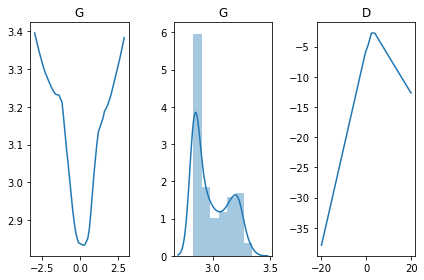

[Epoch 1204/10000] [D loss: -0.999887] [G loss: 2.748770]
[Epoch 1208/10000] [D loss: -0.999938] [G loss: 2.751178]
[Epoch 1212/10000] [D loss: -0.999831] [G loss: 2.742967]
[Epoch 1216/10000] [D loss: -0.999881] [G loss: 2.738540]
[Epoch 1220/10000] [D loss: -0.999722] [G loss: 2.757082]
[Epoch 1224/10000] [D loss: -0.999942] [G loss: 2.751765]
[Epoch 1228/10000] [D loss: -0.999924] [G loss: 2.744975]
[Epoch 1232/10000] [D loss: -0.999708] [G loss: 2.749027]
[Epoch 1236/10000] [D loss: -0.999998] [G loss: 2.744060]
[Epoch 1240/10000] [D loss: -0.999747] [G loss: 2.750404]
[Epoch 1244/10000] [D loss: -0.999767] [G loss: 2.733096]
[Epoch 1248/10000] [D loss: -0.999967] [G loss: 2.747646]
[Epoch 1252/10000] [D loss: -0.999709] [G loss: 2.752322]
[Epoch 1256/10000] [D loss: -0.999904] [G loss: 2.745043]
[Epoch 1260/10000] [D loss: -0.999768] [G loss: 2.754267]
[Epoch 1264/10000] [D loss: -0.999838] [G loss: 2.755422]
[Epoch 1268/10000] [D loss: -0.999644] [G loss: 2.770278]
[Epoch 1272/10

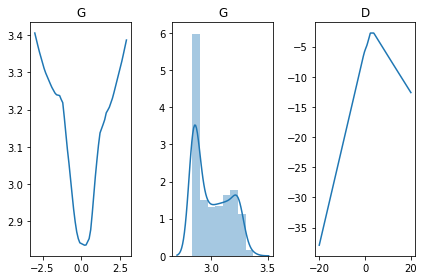

[Epoch 1304/10000] [D loss: -0.999991] [G loss: 2.761711]
[Epoch 1308/10000] [D loss: -0.999507] [G loss: 2.749542]
[Epoch 1312/10000] [D loss: -0.999829] [G loss: 2.749655]
[Epoch 1316/10000] [D loss: -0.999862] [G loss: 2.760838]
[Epoch 1320/10000] [D loss: -0.999800] [G loss: 2.765526]
[Epoch 1324/10000] [D loss: -0.999582] [G loss: 2.737159]
[Epoch 1328/10000] [D loss: -0.999807] [G loss: 2.760688]
[Epoch 1332/10000] [D loss: -0.999952] [G loss: 2.770929]
[Epoch 1336/10000] [D loss: -0.999651] [G loss: 2.739539]
[Epoch 1340/10000] [D loss: -0.999671] [G loss: 2.731692]
[Epoch 1344/10000] [D loss: -0.999679] [G loss: 2.761270]
[Epoch 1348/10000] [D loss: -0.999856] [G loss: 2.757800]
[Epoch 1352/10000] [D loss: -0.999934] [G loss: 2.750874]
[Epoch 1356/10000] [D loss: -0.999870] [G loss: 2.752917]
[Epoch 1360/10000] [D loss: -0.999824] [G loss: 2.761452]
[Epoch 1364/10000] [D loss: -0.999996] [G loss: 2.767397]
[Epoch 1368/10000] [D loss: -0.999974] [G loss: 2.742941]
[Epoch 1372/10

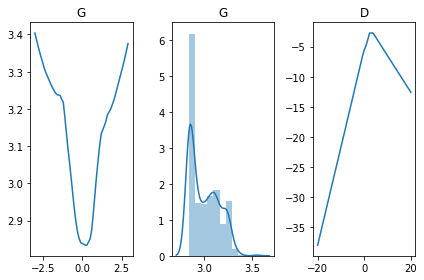

[Epoch 1404/10000] [D loss: -0.999975] [G loss: 2.733050]
[Epoch 1408/10000] [D loss: -0.999493] [G loss: 2.759059]
[Epoch 1412/10000] [D loss: -0.999968] [G loss: 2.732989]
[Epoch 1416/10000] [D loss: -0.999868] [G loss: 2.739031]
[Epoch 1420/10000] [D loss: -0.999956] [G loss: 2.762286]
[Epoch 1424/10000] [D loss: -0.999901] [G loss: 2.754599]
[Epoch 1428/10000] [D loss: -0.999871] [G loss: 2.755039]
[Epoch 1432/10000] [D loss: -0.999828] [G loss: 2.750391]
[Epoch 1436/10000] [D loss: -0.999732] [G loss: 2.753664]
[Epoch 1440/10000] [D loss: -0.999846] [G loss: 2.756237]
[Epoch 1444/10000] [D loss: -0.999964] [G loss: 2.756335]
[Epoch 1448/10000] [D loss: -0.999873] [G loss: 2.750260]
[Epoch 1452/10000] [D loss: -0.999899] [G loss: 2.755650]
[Epoch 1456/10000] [D loss: -0.999925] [G loss: 2.742023]
[Epoch 1460/10000] [D loss: -0.999671] [G loss: 2.754077]
[Epoch 1464/10000] [D loss: -0.999645] [G loss: 2.764367]
[Epoch 1468/10000] [D loss: -0.999809] [G loss: 2.769606]
[Epoch 1472/10

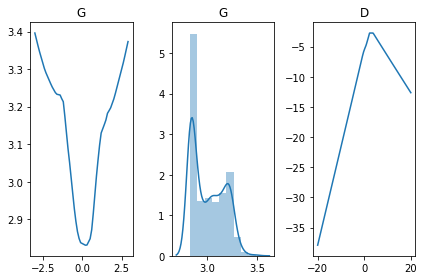

[Epoch 1504/10000] [D loss: -0.999905] [G loss: 2.746516]
[Epoch 1508/10000] [D loss: -0.999885] [G loss: 2.749530]
[Epoch 1512/10000] [D loss: -0.999478] [G loss: 2.729272]
[Epoch 1516/10000] [D loss: -0.999739] [G loss: 2.760287]
[Epoch 1520/10000] [D loss: -0.999803] [G loss: 2.752539]
[Epoch 1524/10000] [D loss: -0.999976] [G loss: 2.745221]
[Epoch 1528/10000] [D loss: -0.999645] [G loss: 2.734951]
[Epoch 1532/10000] [D loss: -0.999576] [G loss: 2.765594]
[Epoch 1536/10000] [D loss: -0.999892] [G loss: 2.754918]
[Epoch 1540/10000] [D loss: -0.999638] [G loss: 2.762774]
[Epoch 1544/10000] [D loss: -0.999885] [G loss: 2.760273]
[Epoch 1548/10000] [D loss: -0.999945] [G loss: 2.740724]
[Epoch 1552/10000] [D loss: -0.999934] [G loss: 2.761382]
[Epoch 1556/10000] [D loss: -0.999842] [G loss: 2.747243]
[Epoch 1560/10000] [D loss: -0.999964] [G loss: 2.755723]
[Epoch 1564/10000] [D loss: -0.999881] [G loss: 2.750294]
[Epoch 1568/10000] [D loss: -0.999919] [G loss: 2.749052]
[Epoch 1572/10

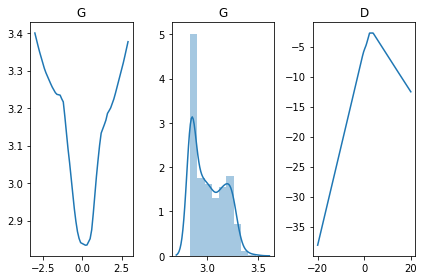

[Epoch 1604/10000] [D loss: -0.999843] [G loss: 2.745883]
[Epoch 1608/10000] [D loss: -0.999963] [G loss: 2.765131]
[Epoch 1612/10000] [D loss: -0.999754] [G loss: 2.756707]
[Epoch 1616/10000] [D loss: -0.999962] [G loss: 2.769668]
[Epoch 1620/10000] [D loss: -0.999877] [G loss: 2.739143]
[Epoch 1624/10000] [D loss: -0.999931] [G loss: 2.745250]
[Epoch 1628/10000] [D loss: -0.999964] [G loss: 2.740193]
[Epoch 1632/10000] [D loss: -0.999956] [G loss: 2.771662]
[Epoch 1636/10000] [D loss: -0.999926] [G loss: 2.735936]
[Epoch 1640/10000] [D loss: -0.999621] [G loss: 2.748332]
[Epoch 1644/10000] [D loss: -0.999976] [G loss: 2.768825]
[Epoch 1648/10000] [D loss: -0.999999] [G loss: 2.771683]
[Epoch 1652/10000] [D loss: -0.999905] [G loss: 2.765999]
[Epoch 1656/10000] [D loss: -0.999993] [G loss: 2.739875]
[Epoch 1660/10000] [D loss: -0.999762] [G loss: 2.745405]
[Epoch 1664/10000] [D loss: -0.999899] [G loss: 2.770794]
[Epoch 1668/10000] [D loss: -0.999805] [G loss: 2.758838]
[Epoch 1672/10

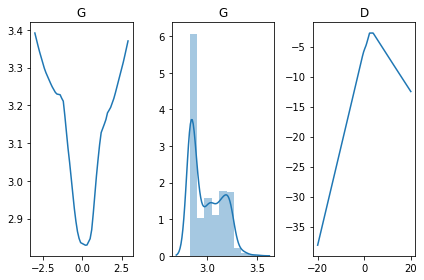

[Epoch 1704/10000] [D loss: -0.999676] [G loss: 2.739893]
[Epoch 1708/10000] [D loss: -0.999898] [G loss: 2.738192]
[Epoch 1712/10000] [D loss: -0.999656] [G loss: 2.740369]
[Epoch 1716/10000] [D loss: -0.999407] [G loss: 2.748567]
[Epoch 1720/10000] [D loss: -0.999913] [G loss: 2.760199]
[Epoch 1724/10000] [D loss: -0.999624] [G loss: 2.751878]
[Epoch 1728/10000] [D loss: -0.999750] [G loss: 2.758751]
[Epoch 1732/10000] [D loss: -0.999780] [G loss: 2.757507]
[Epoch 1736/10000] [D loss: -0.999744] [G loss: 2.753402]
[Epoch 1740/10000] [D loss: -0.999782] [G loss: 2.743860]
[Epoch 1744/10000] [D loss: -0.999813] [G loss: 2.747576]
[Epoch 1748/10000] [D loss: -0.999931] [G loss: 2.758767]
[Epoch 1752/10000] [D loss: -0.999837] [G loss: 2.759176]
[Epoch 1756/10000] [D loss: -0.999979] [G loss: 2.773009]
[Epoch 1760/10000] [D loss: -0.999644] [G loss: 2.728617]
[Epoch 1764/10000] [D loss: -0.999795] [G loss: 2.725015]
[Epoch 1768/10000] [D loss: -0.999953] [G loss: 2.750797]
[Epoch 1772/10

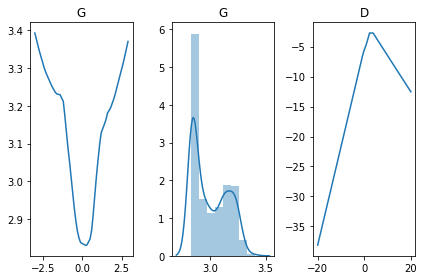

[Epoch 1804/10000] [D loss: -0.999969] [G loss: 2.754198]
[Epoch 1808/10000] [D loss: -0.999702] [G loss: 2.749244]
[Epoch 1812/10000] [D loss: -0.999518] [G loss: 2.760277]
[Epoch 1816/10000] [D loss: -0.999625] [G loss: 2.742060]
[Epoch 1820/10000] [D loss: -0.999930] [G loss: 2.755283]
[Epoch 1824/10000] [D loss: -0.999588] [G loss: 2.728651]
[Epoch 1828/10000] [D loss: -0.999720] [G loss: 2.734002]
[Epoch 1832/10000] [D loss: -0.999966] [G loss: 2.733770]
[Epoch 1836/10000] [D loss: -0.999932] [G loss: 2.769778]
[Epoch 1840/10000] [D loss: -0.999889] [G loss: 2.759431]
[Epoch 1844/10000] [D loss: -0.999916] [G loss: 2.765809]
[Epoch 1848/10000] [D loss: -0.999699] [G loss: 2.741181]
[Epoch 1852/10000] [D loss: -0.999894] [G loss: 2.759069]
[Epoch 1856/10000] [D loss: -0.999822] [G loss: 2.755168]
[Epoch 1860/10000] [D loss: -0.999374] [G loss: 2.758998]
[Epoch 1864/10000] [D loss: -0.999689] [G loss: 2.739843]
[Epoch 1868/10000] [D loss: -0.999684] [G loss: 2.738899]
[Epoch 1872/10

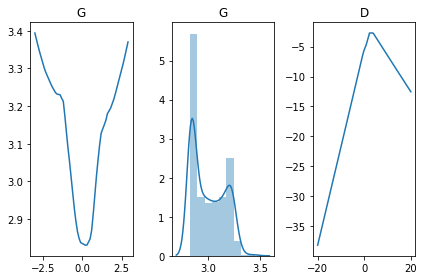

[Epoch 1904/10000] [D loss: -0.999539] [G loss: 2.758217]
[Epoch 1908/10000] [D loss: -0.999962] [G loss: 2.760808]
[Epoch 1912/10000] [D loss: -0.999807] [G loss: 2.750863]
[Epoch 1916/10000] [D loss: -0.999993] [G loss: 2.723043]
[Epoch 1920/10000] [D loss: -0.999859] [G loss: 2.725427]
[Epoch 1924/10000] [D loss: -0.999914] [G loss: 2.745002]
[Epoch 1928/10000] [D loss: -0.999782] [G loss: 2.723059]
[Epoch 1932/10000] [D loss: -0.999667] [G loss: 2.740982]
[Epoch 1936/10000] [D loss: -0.999924] [G loss: 2.739588]
[Epoch 1940/10000] [D loss: -0.999771] [G loss: 2.746397]
[Epoch 1944/10000] [D loss: -0.999960] [G loss: 2.760942]
[Epoch 1948/10000] [D loss: -0.999569] [G loss: 2.748991]
[Epoch 1952/10000] [D loss: -0.999634] [G loss: 2.752211]
[Epoch 1956/10000] [D loss: -0.999715] [G loss: 2.742965]
[Epoch 1960/10000] [D loss: -0.999845] [G loss: 2.737422]
[Epoch 1964/10000] [D loss: -0.999720] [G loss: 2.742301]
[Epoch 1968/10000] [D loss: -0.999726] [G loss: 2.736302]
[Epoch 1972/10

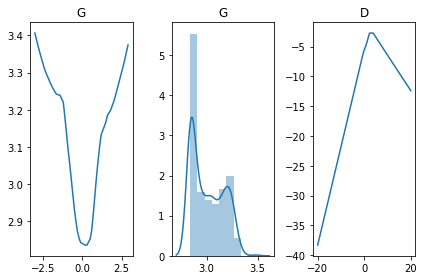

[Epoch 2004/10000] [D loss: -0.999541] [G loss: 2.776760]
[Epoch 2008/10000] [D loss: -0.999543] [G loss: 2.748479]
[Epoch 2012/10000] [D loss: -0.999908] [G loss: 2.728554]
[Epoch 2016/10000] [D loss: -0.999773] [G loss: 2.734706]
[Epoch 2020/10000] [D loss: -0.999737] [G loss: 2.760687]
[Epoch 2024/10000] [D loss: -0.999697] [G loss: 2.752160]
[Epoch 2028/10000] [D loss: -0.999783] [G loss: 2.759685]
[Epoch 2032/10000] [D loss: -0.999810] [G loss: 2.738451]
[Epoch 2036/10000] [D loss: -0.999968] [G loss: 2.732783]
[Epoch 2040/10000] [D loss: -0.999701] [G loss: 2.743066]
[Epoch 2044/10000] [D loss: -0.999597] [G loss: 2.739012]
[Epoch 2048/10000] [D loss: -0.999958] [G loss: 2.746483]
[Epoch 2052/10000] [D loss: -0.999702] [G loss: 2.756149]
[Epoch 2056/10000] [D loss: -0.999719] [G loss: 2.753264]
[Epoch 2060/10000] [D loss: -0.999645] [G loss: 2.756567]
[Epoch 2064/10000] [D loss: -0.999899] [G loss: 2.756888]
[Epoch 2068/10000] [D loss: -0.999465] [G loss: 2.732317]
[Epoch 2072/10

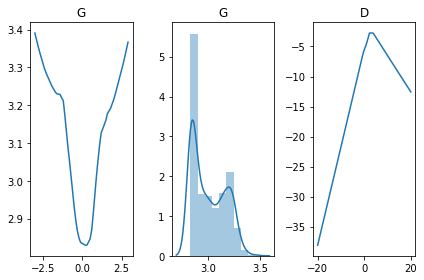

[Epoch 2104/10000] [D loss: -0.999821] [G loss: 2.752595]
[Epoch 2108/10000] [D loss: -0.999678] [G loss: 2.741994]
[Epoch 2112/10000] [D loss: -0.999898] [G loss: 2.753414]
[Epoch 2116/10000] [D loss: -0.999581] [G loss: 2.757571]
[Epoch 2120/10000] [D loss: -0.999964] [G loss: 2.765883]
[Epoch 2124/10000] [D loss: -0.999720] [G loss: 2.736360]
[Epoch 2128/10000] [D loss: -0.999647] [G loss: 2.736151]
[Epoch 2132/10000] [D loss: -0.999835] [G loss: 2.733803]
[Epoch 2136/10000] [D loss: -0.999854] [G loss: 2.749128]
[Epoch 2140/10000] [D loss: -0.999753] [G loss: 2.741816]
[Epoch 2144/10000] [D loss: -0.999729] [G loss: 2.735516]
[Epoch 2148/10000] [D loss: -0.999712] [G loss: 2.729039]
[Epoch 2152/10000] [D loss: -0.999733] [G loss: 2.754232]
[Epoch 2156/10000] [D loss: -0.999697] [G loss: 2.755837]
[Epoch 2160/10000] [D loss: -0.999721] [G loss: 2.750015]
[Epoch 2164/10000] [D loss: -0.999754] [G loss: 2.734092]
[Epoch 2168/10000] [D loss: -0.999991] [G loss: 2.708369]
[Epoch 2172/10

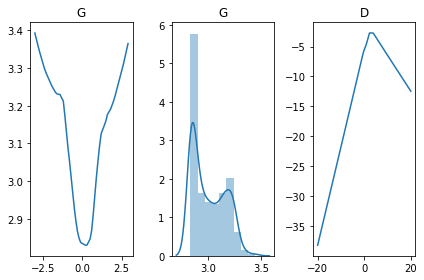

[Epoch 2204/10000] [D loss: -0.999941] [G loss: 2.729971]
[Epoch 2208/10000] [D loss: -0.999725] [G loss: 2.739878]
[Epoch 2212/10000] [D loss: -0.999942] [G loss: 2.736024]
[Epoch 2216/10000] [D loss: -0.999866] [G loss: 2.745234]
[Epoch 2220/10000] [D loss: -0.999730] [G loss: 2.740342]
[Epoch 2224/10000] [D loss: -0.999980] [G loss: 2.761343]
[Epoch 2228/10000] [D loss: -0.999906] [G loss: 2.753657]
[Epoch 2232/10000] [D loss: -0.999875] [G loss: 2.746324]
[Epoch 2236/10000] [D loss: -0.999893] [G loss: 2.742703]
[Epoch 2240/10000] [D loss: -0.999701] [G loss: 2.758630]
[Epoch 2244/10000] [D loss: -0.999508] [G loss: 2.724153]
[Epoch 2248/10000] [D loss: -0.999887] [G loss: 2.746475]
[Epoch 2252/10000] [D loss: -0.999915] [G loss: 2.730027]
[Epoch 2256/10000] [D loss: -0.999934] [G loss: 2.711604]
[Epoch 2260/10000] [D loss: -0.999629] [G loss: 2.758523]
[Epoch 2264/10000] [D loss: -0.999970] [G loss: 2.755298]
[Epoch 2268/10000] [D loss: -0.999626] [G loss: 2.749542]
[Epoch 2272/10

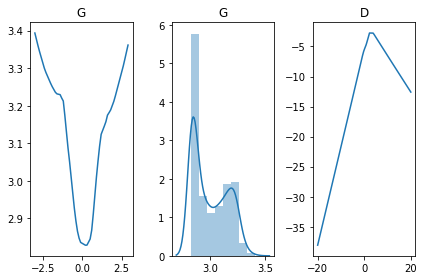

[Epoch 2304/10000] [D loss: -0.999237] [G loss: 2.733794]
[Epoch 2308/10000] [D loss: -0.999943] [G loss: 2.721915]
[Epoch 2312/10000] [D loss: -0.999837] [G loss: 2.744186]
[Epoch 2316/10000] [D loss: -0.999720] [G loss: 2.743349]
[Epoch 2320/10000] [D loss: -0.999938] [G loss: 2.773429]
[Epoch 2324/10000] [D loss: -0.999890] [G loss: 2.729338]
[Epoch 2328/10000] [D loss: -0.999779] [G loss: 2.734915]
[Epoch 2332/10000] [D loss: -0.999740] [G loss: 2.740337]
[Epoch 2336/10000] [D loss: -0.999593] [G loss: 2.718866]
[Epoch 2340/10000] [D loss: -0.999688] [G loss: 2.742742]
[Epoch 2344/10000] [D loss: -0.999989] [G loss: 2.736174]
[Epoch 2348/10000] [D loss: -0.999965] [G loss: 2.765865]
[Epoch 2352/10000] [D loss: -0.999899] [G loss: 2.768660]
[Epoch 2356/10000] [D loss: -0.999584] [G loss: 2.725263]
[Epoch 2360/10000] [D loss: -0.999670] [G loss: 2.742655]
[Epoch 2364/10000] [D loss: -0.999585] [G loss: 2.751378]
[Epoch 2368/10000] [D loss: -0.999771] [G loss: 2.748778]
[Epoch 2372/10

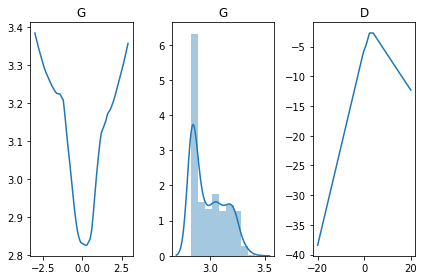

[Epoch 2404/10000] [D loss: -0.999770] [G loss: 2.719838]
[Epoch 2408/10000] [D loss: -0.999819] [G loss: 2.742796]
[Epoch 2412/10000] [D loss: -0.999795] [G loss: 2.748850]
[Epoch 2416/10000] [D loss: -0.999511] [G loss: 2.753679]
[Epoch 2420/10000] [D loss: -0.999783] [G loss: 2.741374]
[Epoch 2424/10000] [D loss: -0.999645] [G loss: 2.742355]
[Epoch 2428/10000] [D loss: -0.999964] [G loss: 2.715386]
[Epoch 2432/10000] [D loss: -0.999740] [G loss: 2.746881]
[Epoch 2436/10000] [D loss: -0.999854] [G loss: 2.741051]
[Epoch 2440/10000] [D loss: -0.999756] [G loss: 2.745660]
[Epoch 2444/10000] [D loss: -0.999462] [G loss: 2.742854]
[Epoch 2448/10000] [D loss: -0.999908] [G loss: 2.756343]
[Epoch 2452/10000] [D loss: -0.999672] [G loss: 2.736914]
[Epoch 2456/10000] [D loss: -0.999655] [G loss: 2.721658]
[Epoch 2460/10000] [D loss: -0.999530] [G loss: 2.738673]
[Epoch 2464/10000] [D loss: -0.999997] [G loss: 2.755851]
[Epoch 2468/10000] [D loss: -0.999429] [G loss: 2.713187]
[Epoch 2472/10

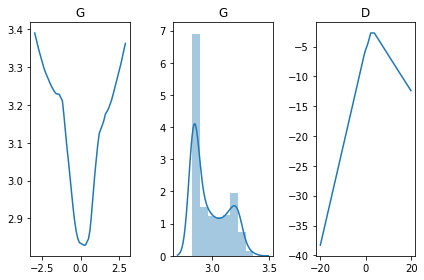

[Epoch 2504/10000] [D loss: -0.999963] [G loss: 2.756687]
[Epoch 2508/10000] [D loss: -0.999669] [G loss: 2.729481]
[Epoch 2512/10000] [D loss: -0.999672] [G loss: 2.729964]
[Epoch 2516/10000] [D loss: -0.999510] [G loss: 2.701134]
[Epoch 2520/10000] [D loss: -0.999790] [G loss: 2.728433]
[Epoch 2524/10000] [D loss: -0.999814] [G loss: 2.721432]
[Epoch 2528/10000] [D loss: -0.999619] [G loss: 2.742704]
[Epoch 2532/10000] [D loss: -0.999555] [G loss: 2.733381]
[Epoch 2536/10000] [D loss: -0.999784] [G loss: 2.752910]
[Epoch 2540/10000] [D loss: -0.999955] [G loss: 2.762227]
[Epoch 2544/10000] [D loss: -0.999891] [G loss: 2.739036]
[Epoch 2548/10000] [D loss: -0.999332] [G loss: 2.760957]
[Epoch 2552/10000] [D loss: -0.999871] [G loss: 2.731271]
[Epoch 2556/10000] [D loss: -0.999456] [G loss: 2.730474]
[Epoch 2560/10000] [D loss: -0.999867] [G loss: 2.742723]
[Epoch 2564/10000] [D loss: -0.999858] [G loss: 2.736333]
[Epoch 2568/10000] [D loss: -0.999556] [G loss: 2.703907]
[Epoch 2572/10

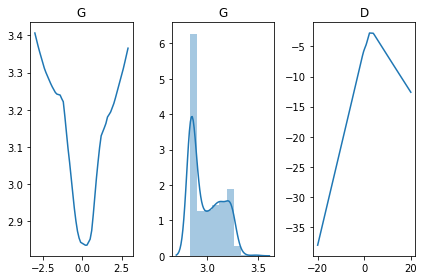

[Epoch 2604/10000] [D loss: -0.999013] [G loss: 2.716002]
[Epoch 2608/10000] [D loss: -0.999945] [G loss: 2.732138]
[Epoch 2612/10000] [D loss: -0.999648] [G loss: 2.743272]
[Epoch 2616/10000] [D loss: -0.999702] [G loss: 2.739518]
[Epoch 2620/10000] [D loss: -0.999726] [G loss: 2.738932]
[Epoch 2624/10000] [D loss: -0.999724] [G loss: 2.743940]
[Epoch 2628/10000] [D loss: -0.999663] [G loss: 2.722363]
[Epoch 2632/10000] [D loss: -0.999569] [G loss: 2.731187]
[Epoch 2636/10000] [D loss: -0.999935] [G loss: 2.735802]
[Epoch 2640/10000] [D loss: -0.999715] [G loss: 2.742148]
[Epoch 2644/10000] [D loss: -0.999523] [G loss: 2.763895]
[Epoch 2648/10000] [D loss: -0.999918] [G loss: 2.731172]
[Epoch 2652/10000] [D loss: -0.999808] [G loss: 2.731300]
[Epoch 2656/10000] [D loss: -0.999696] [G loss: 2.750233]
[Epoch 2660/10000] [D loss: -0.999800] [G loss: 2.737243]
[Epoch 2664/10000] [D loss: -0.999699] [G loss: 2.729963]
[Epoch 2668/10000] [D loss: -0.999589] [G loss: 2.715924]
[Epoch 2672/10

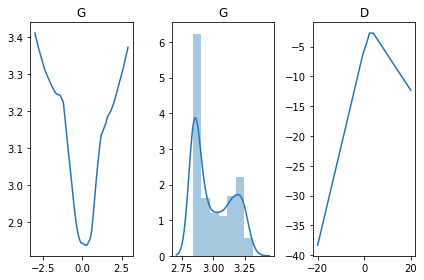

[Epoch 2704/10000] [D loss: -0.999819] [G loss: 2.746556]
[Epoch 2708/10000] [D loss: -0.999767] [G loss: 2.743917]
[Epoch 2712/10000] [D loss: -0.999951] [G loss: 2.713335]
[Epoch 2716/10000] [D loss: -0.999819] [G loss: 2.734752]
[Epoch 2720/10000] [D loss: -0.999306] [G loss: 2.720893]
[Epoch 2724/10000] [D loss: -0.999864] [G loss: 2.714798]
[Epoch 2728/10000] [D loss: -0.999620] [G loss: 2.752882]
[Epoch 2732/10000] [D loss: -0.999573] [G loss: 2.746315]
[Epoch 2736/10000] [D loss: -0.999926] [G loss: 2.741350]
[Epoch 2740/10000] [D loss: -0.999739] [G loss: 2.733426]
[Epoch 2744/10000] [D loss: -0.999673] [G loss: 2.749336]
[Epoch 2748/10000] [D loss: -0.999827] [G loss: 2.743556]
[Epoch 2752/10000] [D loss: -0.999853] [G loss: 2.747704]
[Epoch 2756/10000] [D loss: -0.999686] [G loss: 2.755843]
[Epoch 2760/10000] [D loss: -0.999372] [G loss: 2.725856]
[Epoch 2764/10000] [D loss: -0.999835] [G loss: 2.717309]
[Epoch 2768/10000] [D loss: -0.999742] [G loss: 2.727984]
[Epoch 2772/10

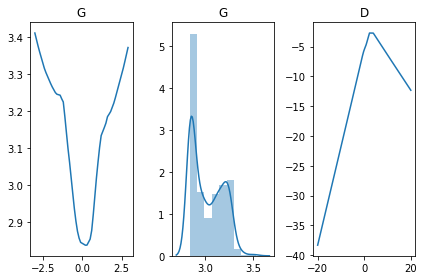

[Epoch 2804/10000] [D loss: -0.999897] [G loss: 2.741578]
[Epoch 2808/10000] [D loss: -0.999983] [G loss: 2.714452]
[Epoch 2812/10000] [D loss: -0.999723] [G loss: 2.732967]
[Epoch 2816/10000] [D loss: -0.999997] [G loss: 2.763780]
[Epoch 2820/10000] [D loss: -0.999699] [G loss: 2.735285]
[Epoch 2824/10000] [D loss: -0.999208] [G loss: 2.710171]
[Epoch 2828/10000] [D loss: -0.999514] [G loss: 2.733261]
[Epoch 2832/10000] [D loss: -0.999710] [G loss: 2.731437]
[Epoch 2836/10000] [D loss: -0.999928] [G loss: 2.740991]
[Epoch 2840/10000] [D loss: -0.999865] [G loss: 2.725684]
[Epoch 2844/10000] [D loss: -0.999930] [G loss: 2.766129]
[Epoch 2848/10000] [D loss: -0.999955] [G loss: 2.747147]
[Epoch 2852/10000] [D loss: -0.999890] [G loss: 2.735022]
[Epoch 2856/10000] [D loss: -0.999972] [G loss: 2.745441]
[Epoch 2860/10000] [D loss: -0.999852] [G loss: 2.741628]
[Epoch 2864/10000] [D loss: -0.999807] [G loss: 2.733386]
[Epoch 2868/10000] [D loss: -0.999361] [G loss: 2.697265]
[Epoch 2872/10

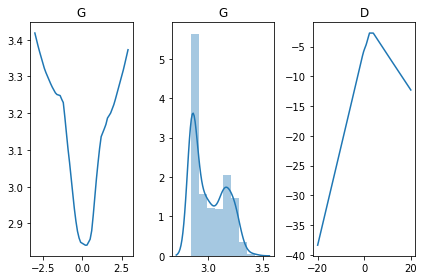

[Epoch 2904/10000] [D loss: -0.999808] [G loss: 2.760144]
[Epoch 2908/10000] [D loss: -0.999653] [G loss: 2.732979]
[Epoch 2912/10000] [D loss: -0.999782] [G loss: 2.728616]
[Epoch 2916/10000] [D loss: -0.999697] [G loss: 2.734756]
[Epoch 2920/10000] [D loss: -0.999951] [G loss: 2.730050]
[Epoch 2924/10000] [D loss: -0.999813] [G loss: 2.750188]
[Epoch 2928/10000] [D loss: -0.999922] [G loss: 2.771107]
[Epoch 2932/10000] [D loss: -0.999673] [G loss: 2.727807]
[Epoch 2936/10000] [D loss: -0.999754] [G loss: 2.744036]
[Epoch 2940/10000] [D loss: -0.999997] [G loss: 2.765824]
[Epoch 2944/10000] [D loss: -0.999500] [G loss: 2.721377]
[Epoch 2948/10000] [D loss: -0.999746] [G loss: 2.735090]
[Epoch 2952/10000] [D loss: -0.999984] [G loss: 2.749274]
[Epoch 2956/10000] [D loss: -0.999880] [G loss: 2.753531]
[Epoch 2960/10000] [D loss: -0.999973] [G loss: 2.716377]
[Epoch 2964/10000] [D loss: -0.999721] [G loss: 2.723810]
[Epoch 2968/10000] [D loss: -0.999615] [G loss: 2.712506]
[Epoch 2972/10

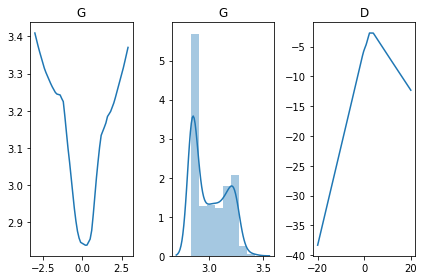

[Epoch 3004/10000] [D loss: -0.999720] [G loss: 2.715540]
[Epoch 3008/10000] [D loss: -0.999806] [G loss: 2.726799]
[Epoch 3012/10000] [D loss: -0.999783] [G loss: 2.738062]
[Epoch 3016/10000] [D loss: -0.999717] [G loss: 2.760441]
[Epoch 3020/10000] [D loss: -0.999749] [G loss: 2.744209]
[Epoch 3024/10000] [D loss: -0.999721] [G loss: 2.715291]
[Epoch 3028/10000] [D loss: -0.999225] [G loss: 2.743973]
[Epoch 3032/10000] [D loss: -0.999995] [G loss: 2.756717]
[Epoch 3036/10000] [D loss: -0.999936] [G loss: 2.759485]
[Epoch 3040/10000] [D loss: -0.999292] [G loss: 2.718433]
[Epoch 3044/10000] [D loss: -0.999782] [G loss: 2.719977]
[Epoch 3048/10000] [D loss: -0.999743] [G loss: 2.737945]
[Epoch 3052/10000] [D loss: -0.999969] [G loss: 2.763757]
[Epoch 3056/10000] [D loss: -0.999934] [G loss: 2.708023]
[Epoch 3060/10000] [D loss: -0.999947] [G loss: 2.757868]
[Epoch 3064/10000] [D loss: -0.999970] [G loss: 2.709321]
[Epoch 3068/10000] [D loss: -0.999835] [G loss: 2.697475]
[Epoch 3072/10

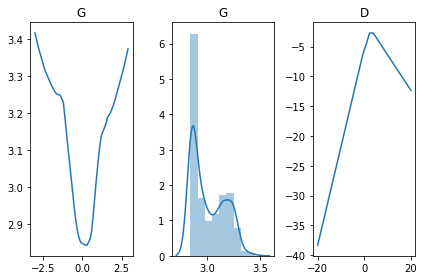

[Epoch 3104/10000] [D loss: -0.999853] [G loss: 2.716010]
[Epoch 3108/10000] [D loss: -0.999779] [G loss: 2.739538]
[Epoch 3112/10000] [D loss: -0.999907] [G loss: 2.708230]
[Epoch 3116/10000] [D loss: -0.999637] [G loss: 2.750189]
[Epoch 3120/10000] [D loss: -0.999959] [G loss: 2.747051]
[Epoch 3124/10000] [D loss: -0.999719] [G loss: 2.733305]
[Epoch 3128/10000] [D loss: -0.999420] [G loss: 2.764737]
[Epoch 3132/10000] [D loss: -0.999761] [G loss: 2.751917]
[Epoch 3136/10000] [D loss: -0.999972] [G loss: 2.761097]
[Epoch 3140/10000] [D loss: -0.999777] [G loss: 2.678222]
[Epoch 3144/10000] [D loss: -0.999925] [G loss: 2.747741]
[Epoch 3148/10000] [D loss: -0.999954] [G loss: 2.720250]
[Epoch 3152/10000] [D loss: -0.999902] [G loss: 2.728129]
[Epoch 3156/10000] [D loss: -0.999904] [G loss: 2.733026]
[Epoch 3160/10000] [D loss: -0.999574] [G loss: 2.745067]
[Epoch 3164/10000] [D loss: -0.999668] [G loss: 2.722192]
[Epoch 3168/10000] [D loss: -0.999628] [G loss: 2.707773]
[Epoch 3172/10

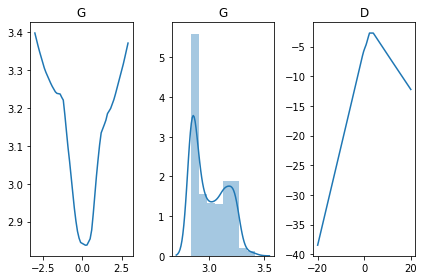

[Epoch 3204/10000] [D loss: -0.999514] [G loss: 2.717605]
[Epoch 3208/10000] [D loss: -0.999954] [G loss: 2.704663]
[Epoch 3212/10000] [D loss: -0.999581] [G loss: 2.713071]
[Epoch 3216/10000] [D loss: -0.999888] [G loss: 2.729288]
[Epoch 3220/10000] [D loss: -0.999715] [G loss: 2.739535]
[Epoch 3224/10000] [D loss: -0.999962] [G loss: 2.713761]
[Epoch 3228/10000] [D loss: -0.999661] [G loss: 2.731066]
[Epoch 3232/10000] [D loss: -0.999741] [G loss: 2.719120]
[Epoch 3236/10000] [D loss: -0.999541] [G loss: 2.723794]
[Epoch 3240/10000] [D loss: -0.999676] [G loss: 2.724438]
[Epoch 3244/10000] [D loss: -0.999517] [G loss: 2.729150]
[Epoch 3248/10000] [D loss: -0.999687] [G loss: 2.741730]
[Epoch 3252/10000] [D loss: -0.999604] [G loss: 2.715243]
[Epoch 3256/10000] [D loss: -0.999742] [G loss: 2.737055]
[Epoch 3260/10000] [D loss: -0.999841] [G loss: 2.750400]
[Epoch 3264/10000] [D loss: -0.999719] [G loss: 2.710417]
[Epoch 3268/10000] [D loss: -0.999558] [G loss: 2.720344]
[Epoch 3272/10

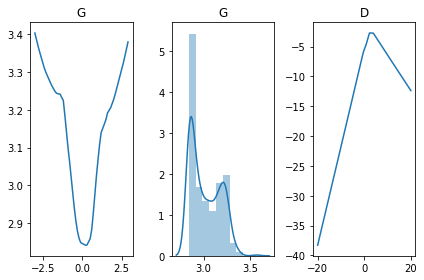

[Epoch 3304/10000] [D loss: -0.999891] [G loss: 2.723207]
[Epoch 3308/10000] [D loss: -0.999993] [G loss: 2.691886]
[Epoch 3312/10000] [D loss: -0.999576] [G loss: 2.733291]
[Epoch 3316/10000] [D loss: -0.999002] [G loss: 2.764536]
[Epoch 3320/10000] [D loss: -0.999859] [G loss: 2.752431]
[Epoch 3324/10000] [D loss: -0.999130] [G loss: 2.683405]
[Epoch 3328/10000] [D loss: -0.999484] [G loss: 2.723414]
[Epoch 3332/10000] [D loss: -0.999620] [G loss: 2.742572]
[Epoch 3336/10000] [D loss: -0.999687] [G loss: 2.723655]
[Epoch 3340/10000] [D loss: -0.999804] [G loss: 2.739426]
[Epoch 3344/10000] [D loss: -0.999360] [G loss: 2.711541]
[Epoch 3348/10000] [D loss: -0.999913] [G loss: 2.699077]
[Epoch 3352/10000] [D loss: -0.999960] [G loss: 2.689269]
[Epoch 3356/10000] [D loss: -0.999893] [G loss: 2.740750]
[Epoch 3360/10000] [D loss: -0.999861] [G loss: 2.751318]
[Epoch 3364/10000] [D loss: -0.999819] [G loss: 2.707170]
[Epoch 3368/10000] [D loss: -0.999507] [G loss: 2.749626]
[Epoch 3372/10

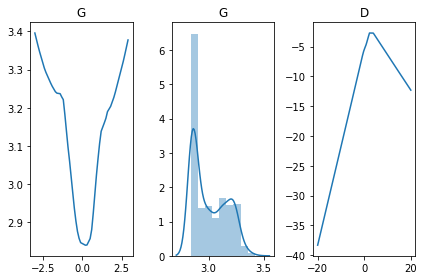

[Epoch 3404/10000] [D loss: -0.999985] [G loss: 2.724206]
[Epoch 3408/10000] [D loss: -0.999931] [G loss: 2.734266]
[Epoch 3412/10000] [D loss: -0.999784] [G loss: 2.750144]
[Epoch 3416/10000] [D loss: -0.999797] [G loss: 2.751833]
[Epoch 3420/10000] [D loss: -0.999931] [G loss: 2.757533]
[Epoch 3424/10000] [D loss: -0.999648] [G loss: 2.694067]
[Epoch 3428/10000] [D loss: -0.999940] [G loss: 2.737885]
[Epoch 3432/10000] [D loss: -0.999703] [G loss: 2.715788]
[Epoch 3436/10000] [D loss: -0.999908] [G loss: 2.702314]
[Epoch 3440/10000] [D loss: -0.999756] [G loss: 2.748867]
[Epoch 3444/10000] [D loss: -0.999470] [G loss: 2.721953]
[Epoch 3448/10000] [D loss: -0.999713] [G loss: 2.725997]
[Epoch 3452/10000] [D loss: -0.999634] [G loss: 2.715403]
[Epoch 3456/10000] [D loss: -0.999874] [G loss: 2.720367]
[Epoch 3460/10000] [D loss: -0.999993] [G loss: 2.701386]
[Epoch 3464/10000] [D loss: -0.999664] [G loss: 2.721909]
[Epoch 3468/10000] [D loss: -0.999898] [G loss: 2.705543]
[Epoch 3472/10

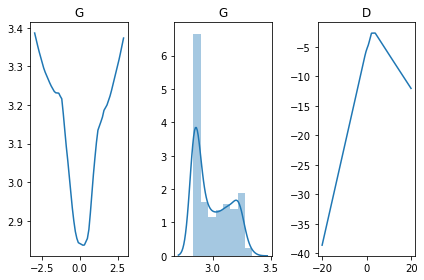

[Epoch 3504/10000] [D loss: -0.999605] [G loss: 2.738318]
[Epoch 3508/10000] [D loss: -0.999734] [G loss: 2.745738]
[Epoch 3512/10000] [D loss: -0.999402] [G loss: 2.706357]
[Epoch 3516/10000] [D loss: -0.999778] [G loss: 2.713336]
[Epoch 3520/10000] [D loss: -0.999660] [G loss: 2.742618]
[Epoch 3524/10000] [D loss: -0.999997] [G loss: 2.695206]
[Epoch 3528/10000] [D loss: -0.999962] [G loss: 2.731402]
[Epoch 3532/10000] [D loss: -0.999923] [G loss: 2.738397]
[Epoch 3536/10000] [D loss: -0.999893] [G loss: 2.753181]
[Epoch 3540/10000] [D loss: -0.999844] [G loss: 2.741311]
[Epoch 3544/10000] [D loss: -0.999999] [G loss: 2.692274]
[Epoch 3548/10000] [D loss: -0.999960] [G loss: 2.718458]
[Epoch 3552/10000] [D loss: -0.999899] [G loss: 2.720352]
[Epoch 3556/10000] [D loss: -0.999766] [G loss: 2.717821]
[Epoch 3560/10000] [D loss: -0.999924] [G loss: 2.765165]
[Epoch 3564/10000] [D loss: -0.999977] [G loss: 2.744998]
[Epoch 3568/10000] [D loss: -0.999954] [G loss: 2.745716]
[Epoch 3572/10

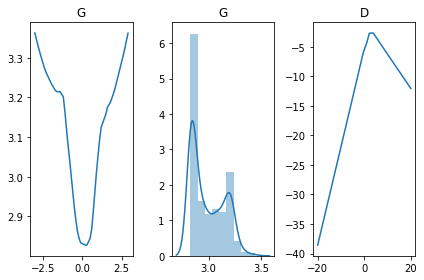

[Epoch 3604/10000] [D loss: -0.999531] [G loss: 2.720821]
[Epoch 3608/10000] [D loss: -0.999789] [G loss: 2.701240]
[Epoch 3612/10000] [D loss: -0.999935] [G loss: 2.727655]
[Epoch 3616/10000] [D loss: -0.999485] [G loss: 2.734850]
[Epoch 3620/10000] [D loss: -0.999906] [G loss: 2.720237]
[Epoch 3624/10000] [D loss: -0.999601] [G loss: 2.714761]
[Epoch 3628/10000] [D loss: -0.999663] [G loss: 2.704320]
[Epoch 3632/10000] [D loss: -0.999827] [G loss: 2.728209]
[Epoch 3636/10000] [D loss: -0.999618] [G loss: 2.737879]
[Epoch 3640/10000] [D loss: -0.999805] [G loss: 2.723226]
[Epoch 3644/10000] [D loss: -0.999515] [G loss: 2.733816]
[Epoch 3648/10000] [D loss: -0.999644] [G loss: 2.727512]
[Epoch 3652/10000] [D loss: -0.999960] [G loss: 2.751163]
[Epoch 3656/10000] [D loss: -0.999969] [G loss: 2.711336]
[Epoch 3660/10000] [D loss: -0.999811] [G loss: 2.736212]
[Epoch 3664/10000] [D loss: -0.999711] [G loss: 2.696928]
[Epoch 3668/10000] [D loss: -0.999927] [G loss: 2.706889]
[Epoch 3672/10

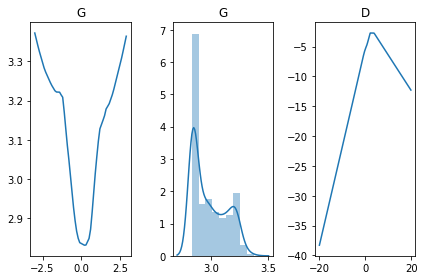

[Epoch 3704/10000] [D loss: -0.999865] [G loss: 2.704829]
[Epoch 3708/10000] [D loss: -0.999882] [G loss: 2.703196]
[Epoch 3712/10000] [D loss: -0.999833] [G loss: 2.686703]
[Epoch 3716/10000] [D loss: -0.999935] [G loss: 2.734015]
[Epoch 3720/10000] [D loss: -0.999600] [G loss: 2.726834]
[Epoch 3724/10000] [D loss: -0.999623] [G loss: 2.714989]
[Epoch 3728/10000] [D loss: -0.999581] [G loss: 2.707152]
[Epoch 3732/10000] [D loss: -0.999666] [G loss: 2.714272]
[Epoch 3736/10000] [D loss: -0.999256] [G loss: 2.705471]
[Epoch 3740/10000] [D loss: -0.999753] [G loss: 2.703141]
[Epoch 3744/10000] [D loss: -0.999958] [G loss: 2.742990]
[Epoch 3748/10000] [D loss: -0.999755] [G loss: 2.709591]
[Epoch 3752/10000] [D loss: -0.999599] [G loss: 2.721009]
[Epoch 3756/10000] [D loss: -0.999949] [G loss: 2.691225]
[Epoch 3760/10000] [D loss: -0.999607] [G loss: 2.718767]
[Epoch 3764/10000] [D loss: -0.999771] [G loss: 2.740603]
[Epoch 3768/10000] [D loss: -0.999830] [G loss: 2.728579]
[Epoch 3772/10

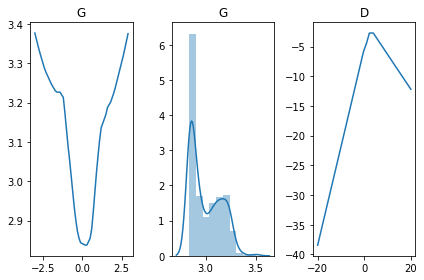

[Epoch 3804/10000] [D loss: -0.999820] [G loss: 2.683033]
[Epoch 3808/10000] [D loss: -0.999861] [G loss: 2.729597]
[Epoch 3812/10000] [D loss: -0.999882] [G loss: 2.695952]
[Epoch 3816/10000] [D loss: -0.999520] [G loss: 2.731532]
[Epoch 3820/10000] [D loss: -0.999786] [G loss: 2.720313]
[Epoch 3824/10000] [D loss: -0.999696] [G loss: 2.710315]
[Epoch 3828/10000] [D loss: -0.999981] [G loss: 2.749672]
[Epoch 3832/10000] [D loss: -0.999709] [G loss: 2.708319]
[Epoch 3836/10000] [D loss: -0.999780] [G loss: 2.704531]
[Epoch 3840/10000] [D loss: -0.999735] [G loss: 2.715176]
[Epoch 3844/10000] [D loss: -0.999883] [G loss: 2.685015]
[Epoch 3848/10000] [D loss: -0.999855] [G loss: 2.711121]
[Epoch 3852/10000] [D loss: -0.999898] [G loss: 2.694299]
[Epoch 3856/10000] [D loss: -0.999521] [G loss: 2.728882]
[Epoch 3860/10000] [D loss: -0.999683] [G loss: 2.746982]
[Epoch 3864/10000] [D loss: -0.999831] [G loss: 2.752179]
[Epoch 3868/10000] [D loss: -0.999180] [G loss: 2.712736]
[Epoch 3872/10

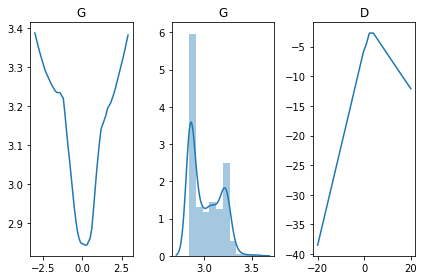

[Epoch 3904/10000] [D loss: -0.999678] [G loss: 2.714313]
[Epoch 3908/10000] [D loss: -0.999731] [G loss: 2.720942]
[Epoch 3912/10000] [D loss: -0.999767] [G loss: 2.699473]
[Epoch 3916/10000] [D loss: -0.999613] [G loss: 2.737440]
[Epoch 3920/10000] [D loss: -0.999828] [G loss: 2.744443]
[Epoch 3924/10000] [D loss: -0.999484] [G loss: 2.704188]
[Epoch 3928/10000] [D loss: -0.999998] [G loss: 2.684033]
[Epoch 3932/10000] [D loss: -0.999987] [G loss: 2.689849]
[Epoch 3936/10000] [D loss: -0.999781] [G loss: 2.721438]
[Epoch 3940/10000] [D loss: -0.999811] [G loss: 2.759661]
[Epoch 3944/10000] [D loss: -0.999670] [G loss: 2.704547]
[Epoch 3948/10000] [D loss: -0.999991] [G loss: 2.687221]
[Epoch 3952/10000] [D loss: -0.999722] [G loss: 2.736228]
[Epoch 3956/10000] [D loss: -0.999671] [G loss: 2.724895]
[Epoch 3960/10000] [D loss: -0.999864] [G loss: 2.708205]
[Epoch 3964/10000] [D loss: -0.999750] [G loss: 2.712271]
[Epoch 3968/10000] [D loss: -0.999758] [G loss: 2.720014]
[Epoch 3972/10

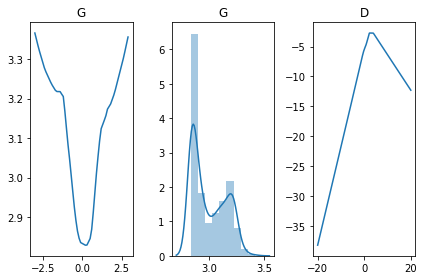

[Epoch 4004/10000] [D loss: -0.999607] [G loss: 2.702516]
[Epoch 4008/10000] [D loss: -0.999255] [G loss: 2.709356]
[Epoch 4012/10000] [D loss: -0.999594] [G loss: 2.691435]
[Epoch 4016/10000] [D loss: -0.999828] [G loss: 2.701854]
[Epoch 4020/10000] [D loss: -0.999423] [G loss: 2.714850]
[Epoch 4024/10000] [D loss: -0.999734] [G loss: 2.716798]
[Epoch 4028/10000] [D loss: -0.999908] [G loss: 2.701554]
[Epoch 4032/10000] [D loss: -0.999867] [G loss: 2.720028]
[Epoch 4036/10000] [D loss: -0.999806] [G loss: 2.719657]
[Epoch 4040/10000] [D loss: -0.999882] [G loss: 2.715021]
[Epoch 4044/10000] [D loss: -0.999567] [G loss: 2.731798]
[Epoch 4048/10000] [D loss: -0.999832] [G loss: 2.700060]
[Epoch 4052/10000] [D loss: -0.999770] [G loss: 2.721484]
[Epoch 4056/10000] [D loss: -0.999842] [G loss: 2.689236]
[Epoch 4060/10000] [D loss: -0.999884] [G loss: 2.723774]
[Epoch 4064/10000] [D loss: -0.999911] [G loss: 2.730777]
[Epoch 4068/10000] [D loss: -0.999447] [G loss: 2.691144]
[Epoch 4072/10

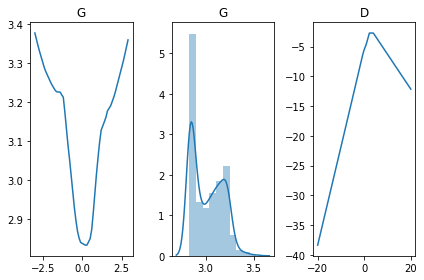

[Epoch 4104/10000] [D loss: -0.999938] [G loss: 2.708549]
[Epoch 4108/10000] [D loss: -0.999819] [G loss: 2.703798]
[Epoch 4112/10000] [D loss: -0.999724] [G loss: 2.706285]
[Epoch 4116/10000] [D loss: -0.999918] [G loss: 2.683162]
[Epoch 4120/10000] [D loss: -0.999576] [G loss: 2.726711]
[Epoch 4124/10000] [D loss: -0.999325] [G loss: 2.767704]
[Epoch 4128/10000] [D loss: -0.999191] [G loss: 2.686603]
[Epoch 4132/10000] [D loss: -0.999949] [G loss: 2.701718]
[Epoch 4136/10000] [D loss: -0.999820] [G loss: 2.698066]
[Epoch 4140/10000] [D loss: -0.999860] [G loss: 2.697807]
[Epoch 4144/10000] [D loss: -0.999286] [G loss: 2.701637]
[Epoch 4148/10000] [D loss: -0.999526] [G loss: 2.696888]
[Epoch 4152/10000] [D loss: -0.999904] [G loss: 2.722961]
[Epoch 4156/10000] [D loss: -0.999626] [G loss: 2.703265]
[Epoch 4160/10000] [D loss: -0.999518] [G loss: 2.720103]
[Epoch 4164/10000] [D loss: -0.999896] [G loss: 2.682392]
[Epoch 4168/10000] [D loss: -0.999855] [G loss: 2.725549]
[Epoch 4172/10

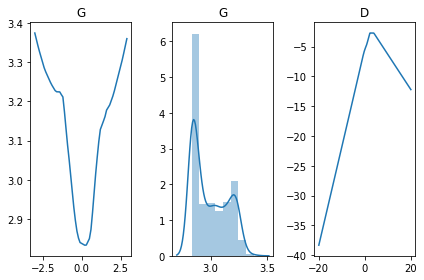

[Epoch 4204/10000] [D loss: -0.999340] [G loss: 2.716580]
[Epoch 4208/10000] [D loss: -0.999909] [G loss: 2.679191]
[Epoch 4212/10000] [D loss: -0.999884] [G loss: 2.712062]
[Epoch 4216/10000] [D loss: -0.999851] [G loss: 2.679745]
[Epoch 4220/10000] [D loss: -0.999658] [G loss: 2.720894]
[Epoch 4224/10000] [D loss: -0.999129] [G loss: 2.715783]
[Epoch 4228/10000] [D loss: -0.999538] [G loss: 2.714380]
[Epoch 4232/10000] [D loss: -0.999981] [G loss: 2.724903]
[Epoch 4236/10000] [D loss: -0.999745] [G loss: 2.712130]
[Epoch 4240/10000] [D loss: -0.999376] [G loss: 2.716819]
[Epoch 4244/10000] [D loss: -0.999809] [G loss: 2.699438]
[Epoch 4248/10000] [D loss: -0.999710] [G loss: 2.684563]
[Epoch 4252/10000] [D loss: -0.999776] [G loss: 2.716660]
[Epoch 4256/10000] [D loss: -0.999992] [G loss: 2.667329]
[Epoch 4260/10000] [D loss: -0.999666] [G loss: 2.721588]
[Epoch 4264/10000] [D loss: -0.999903] [G loss: 2.710110]
[Epoch 4268/10000] [D loss: -0.999487] [G loss: 2.736242]
[Epoch 4272/10

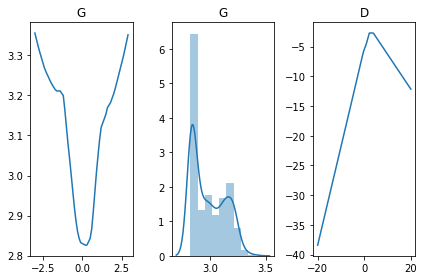

[Epoch 4304/10000] [D loss: -0.999588] [G loss: 2.716222]
[Epoch 4308/10000] [D loss: -0.999738] [G loss: 2.700986]
[Epoch 4312/10000] [D loss: -0.999838] [G loss: 2.728362]
[Epoch 4316/10000] [D loss: -0.999548] [G loss: 2.698168]
[Epoch 4320/10000] [D loss: -0.999654] [G loss: 2.686839]
[Epoch 4324/10000] [D loss: -0.999385] [G loss: 2.701856]
[Epoch 4328/10000] [D loss: -0.999768] [G loss: 2.705965]
[Epoch 4332/10000] [D loss: -0.999921] [G loss: 2.700613]
[Epoch 4336/10000] [D loss: -0.999745] [G loss: 2.701772]
[Epoch 4340/10000] [D loss: -0.999840] [G loss: 2.698630]
[Epoch 4344/10000] [D loss: -0.999815] [G loss: 2.707363]
[Epoch 4348/10000] [D loss: -0.999966] [G loss: 2.730199]
[Epoch 4352/10000] [D loss: -0.999110] [G loss: 2.676560]
[Epoch 4356/10000] [D loss: -0.999652] [G loss: 2.678200]
[Epoch 4360/10000] [D loss: -0.999684] [G loss: 2.678064]
[Epoch 4364/10000] [D loss: -0.999480] [G loss: 2.692250]
[Epoch 4368/10000] [D loss: -0.999874] [G loss: 2.675824]
[Epoch 4372/10

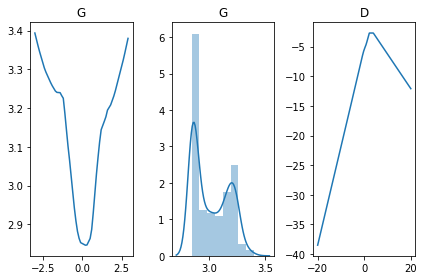

[Epoch 4404/10000] [D loss: -0.999385] [G loss: 2.727864]
[Epoch 4408/10000] [D loss: -0.999824] [G loss: 2.731276]
[Epoch 4412/10000] [D loss: -0.999793] [G loss: 2.729727]
[Epoch 4416/10000] [D loss: -0.999784] [G loss: 2.724477]
[Epoch 4420/10000] [D loss: -0.999566] [G loss: 2.708650]
[Epoch 4424/10000] [D loss: -0.999900] [G loss: 2.707197]
[Epoch 4428/10000] [D loss: -0.999920] [G loss: 2.685436]
[Epoch 4432/10000] [D loss: -0.999772] [G loss: 2.702528]
[Epoch 4436/10000] [D loss: -0.999810] [G loss: 2.673250]
[Epoch 4440/10000] [D loss: -0.999999] [G loss: 2.664976]
[Epoch 4444/10000] [D loss: -0.999974] [G loss: 2.716848]
[Epoch 4448/10000] [D loss: -0.999985] [G loss: 2.671350]
[Epoch 4452/10000] [D loss: -0.999596] [G loss: 2.701511]
[Epoch 4456/10000] [D loss: -0.999987] [G loss: 2.734846]
[Epoch 4460/10000] [D loss: -0.999862] [G loss: 2.699527]
[Epoch 4464/10000] [D loss: -0.999458] [G loss: 2.708597]
[Epoch 4468/10000] [D loss: -0.999840] [G loss: 2.722264]
[Epoch 4472/10

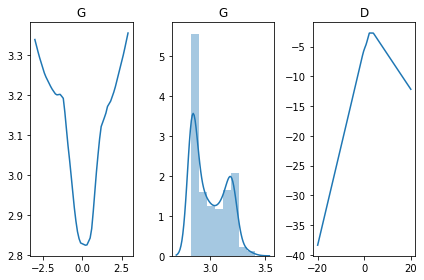

[Epoch 4504/10000] [D loss: -0.999628] [G loss: 2.691055]
[Epoch 4508/10000] [D loss: -0.999688] [G loss: 2.698368]
[Epoch 4512/10000] [D loss: -0.999262] [G loss: 2.649969]
[Epoch 4516/10000] [D loss: -0.999289] [G loss: 2.720998]
[Epoch 4520/10000] [D loss: -0.999363] [G loss: 2.711985]
[Epoch 4524/10000] [D loss: -0.999534] [G loss: 2.712959]
[Epoch 4528/10000] [D loss: -0.999885] [G loss: 2.690397]
[Epoch 4532/10000] [D loss: -0.999859] [G loss: 2.699346]
[Epoch 4536/10000] [D loss: -0.999971] [G loss: 2.673389]
[Epoch 4540/10000] [D loss: -0.999472] [G loss: 2.717169]
[Epoch 4544/10000] [D loss: -0.999720] [G loss: 2.709042]
[Epoch 4548/10000] [D loss: -0.999846] [G loss: 2.695139]
[Epoch 4552/10000] [D loss: -0.999840] [G loss: 2.717306]
[Epoch 4556/10000] [D loss: -0.999618] [G loss: 2.662292]
[Epoch 4560/10000] [D loss: -0.999644] [G loss: 2.682721]
[Epoch 4564/10000] [D loss: -0.999650] [G loss: 2.669419]
[Epoch 4568/10000] [D loss: -0.999694] [G loss: 2.714813]
[Epoch 4572/10

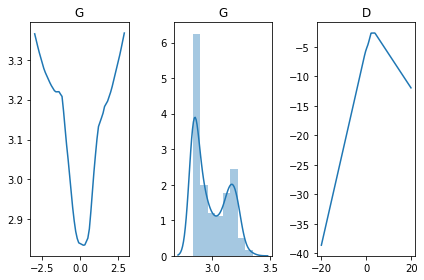

[Epoch 4604/10000] [D loss: -0.999786] [G loss: 2.668716]
[Epoch 4608/10000] [D loss: -0.999929] [G loss: 2.677411]
[Epoch 4612/10000] [D loss: -0.999929] [G loss: 2.738313]
[Epoch 4616/10000] [D loss: -0.999298] [G loss: 2.691587]
[Epoch 4620/10000] [D loss: -0.999688] [G loss: 2.704106]
[Epoch 4624/10000] [D loss: -0.999942] [G loss: 2.677504]
[Epoch 4628/10000] [D loss: -0.999615] [G loss: 2.689724]
[Epoch 4632/10000] [D loss: -0.999528] [G loss: 2.708848]
[Epoch 4636/10000] [D loss: -0.999462] [G loss: 2.722975]
[Epoch 4640/10000] [D loss: -0.999961] [G loss: 2.668789]
[Epoch 4644/10000] [D loss: -0.999814] [G loss: 2.678942]
[Epoch 4648/10000] [D loss: -0.999297] [G loss: 2.718018]
[Epoch 4652/10000] [D loss: -0.999489] [G loss: 2.737452]
[Epoch 4656/10000] [D loss: -0.999844] [G loss: 2.710555]
[Epoch 4660/10000] [D loss: -0.999963] [G loss: 2.692574]
[Epoch 4664/10000] [D loss: -0.999309] [G loss: 2.678474]
[Epoch 4668/10000] [D loss: -0.999933] [G loss: 2.698713]
[Epoch 4672/10

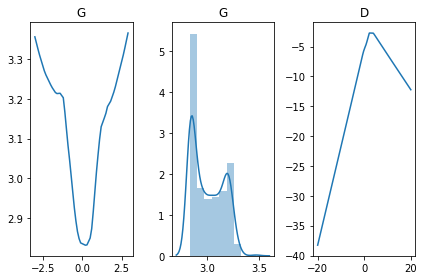

[Epoch 4704/10000] [D loss: -0.999688] [G loss: 2.714306]
[Epoch 4708/10000] [D loss: -0.999994] [G loss: 2.707239]
[Epoch 4712/10000] [D loss: -0.999658] [G loss: 2.692295]
[Epoch 4716/10000] [D loss: -0.999541] [G loss: 2.665672]
[Epoch 4720/10000] [D loss: -0.999429] [G loss: 2.676065]
[Epoch 4724/10000] [D loss: -0.999758] [G loss: 2.690167]
[Epoch 4728/10000] [D loss: -0.999581] [G loss: 2.666971]
[Epoch 4732/10000] [D loss: -0.999287] [G loss: 2.693711]
[Epoch 4736/10000] [D loss: -0.999987] [G loss: 2.726314]
[Epoch 4740/10000] [D loss: -0.999848] [G loss: 2.719526]
[Epoch 4744/10000] [D loss: -0.999559] [G loss: 2.706458]
[Epoch 4748/10000] [D loss: -0.999449] [G loss: 2.705184]
[Epoch 4752/10000] [D loss: -0.999592] [G loss: 2.702825]
[Epoch 4756/10000] [D loss: -0.999588] [G loss: 2.711563]
[Epoch 4760/10000] [D loss: -0.999601] [G loss: 2.681822]
[Epoch 4764/10000] [D loss: -0.999705] [G loss: 2.667025]
[Epoch 4768/10000] [D loss: -0.999784] [G loss: 2.697679]
[Epoch 4772/10

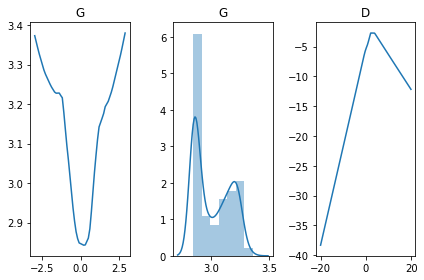

[Epoch 4804/10000] [D loss: -0.999612] [G loss: 2.698384]
[Epoch 4808/10000] [D loss: -0.999893] [G loss: 2.708140]
[Epoch 4812/10000] [D loss: -0.999912] [G loss: 2.695164]
[Epoch 4816/10000] [D loss: -0.999870] [G loss: 2.713496]
[Epoch 4820/10000] [D loss: -0.999843] [G loss: 2.712965]
[Epoch 4824/10000] [D loss: -0.999956] [G loss: 2.698735]
[Epoch 4828/10000] [D loss: -0.999655] [G loss: 2.700211]
[Epoch 4832/10000] [D loss: -0.999769] [G loss: 2.719002]
[Epoch 4836/10000] [D loss: -0.999320] [G loss: 2.688847]
[Epoch 4840/10000] [D loss: -0.999928] [G loss: 2.689854]
[Epoch 4844/10000] [D loss: -0.999156] [G loss: 2.638736]
[Epoch 4848/10000] [D loss: -0.999698] [G loss: 2.664639]
[Epoch 4852/10000] [D loss: -0.999778] [G loss: 2.666577]
[Epoch 4856/10000] [D loss: -0.999733] [G loss: 2.699284]
[Epoch 4860/10000] [D loss: -0.999802] [G loss: 2.713033]
[Epoch 4864/10000] [D loss: -0.999656] [G loss: 2.709665]
[Epoch 4868/10000] [D loss: -0.999753] [G loss: 2.725985]
[Epoch 4872/10

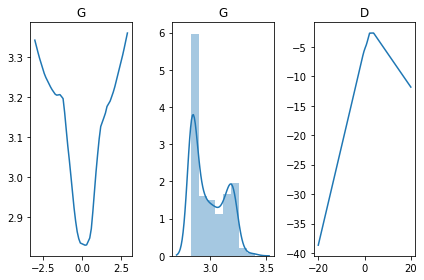

[Epoch 4904/10000] [D loss: -0.999836] [G loss: 2.713907]
[Epoch 4908/10000] [D loss: -0.999449] [G loss: 2.677266]
[Epoch 4912/10000] [D loss: -0.999448] [G loss: 2.673538]
[Epoch 4916/10000] [D loss: -0.999630] [G loss: 2.668513]
[Epoch 4920/10000] [D loss: -0.999882] [G loss: 2.683094]
[Epoch 4924/10000] [D loss: -0.999983] [G loss: 2.681182]
[Epoch 4928/10000] [D loss: -0.999592] [G loss: 2.681701]
[Epoch 4932/10000] [D loss: -0.999759] [G loss: 2.695138]
[Epoch 4936/10000] [D loss: -0.999701] [G loss: 2.690458]
[Epoch 4940/10000] [D loss: -0.999875] [G loss: 2.657980]
[Epoch 4944/10000] [D loss: -0.999996] [G loss: 2.710752]
[Epoch 4948/10000] [D loss: -0.999695] [G loss: 2.698461]
[Epoch 4952/10000] [D loss: -0.999953] [G loss: 2.701832]
[Epoch 4956/10000] [D loss: -0.999639] [G loss: 2.670223]
[Epoch 4960/10000] [D loss: -0.999280] [G loss: 2.710079]
[Epoch 4964/10000] [D loss: -0.999138] [G loss: 2.733359]
[Epoch 4968/10000] [D loss: -0.999533] [G loss: 2.690438]
[Epoch 4972/10

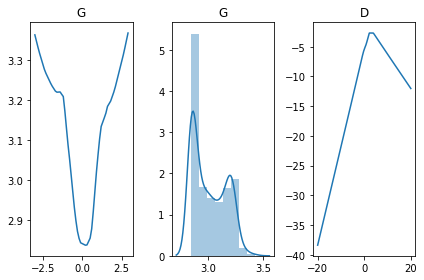

[Epoch 5004/10000] [D loss: -0.999828] [G loss: 2.717660]
[Epoch 5008/10000] [D loss: -0.999683] [G loss: 2.702735]
[Epoch 5012/10000] [D loss: -0.999740] [G loss: 2.666854]
[Epoch 5016/10000] [D loss: -0.999933] [G loss: 2.672370]
[Epoch 5020/10000] [D loss: -0.999533] [G loss: 2.691022]
[Epoch 5024/10000] [D loss: -0.999915] [G loss: 2.696914]
[Epoch 5028/10000] [D loss: -0.999599] [G loss: 2.690270]
[Epoch 5032/10000] [D loss: -0.999682] [G loss: 2.666421]
[Epoch 5036/10000] [D loss: -0.999658] [G loss: 2.679893]
[Epoch 5040/10000] [D loss: -0.999296] [G loss: 2.676761]
[Epoch 5044/10000] [D loss: -0.999725] [G loss: 2.690491]
[Epoch 5048/10000] [D loss: -0.999646] [G loss: 2.691815]
[Epoch 5052/10000] [D loss: -0.999782] [G loss: 2.681522]
[Epoch 5056/10000] [D loss: -0.999675] [G loss: 2.685135]
[Epoch 5060/10000] [D loss: -0.999427] [G loss: 2.693725]
[Epoch 5064/10000] [D loss: -0.999742] [G loss: 2.703845]
[Epoch 5068/10000] [D loss: -0.999535] [G loss: 2.696162]
[Epoch 5072/10

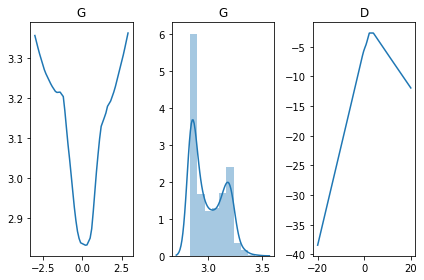

[Epoch 5104/10000] [D loss: -0.999763] [G loss: 2.694167]
[Epoch 5108/10000] [D loss: -0.999546] [G loss: 2.692068]
[Epoch 5112/10000] [D loss: -0.999821] [G loss: 2.697442]
[Epoch 5116/10000] [D loss: -0.999881] [G loss: 2.703022]
[Epoch 5120/10000] [D loss: -0.999865] [G loss: 2.668272]
[Epoch 5124/10000] [D loss: -0.999896] [G loss: 2.681754]
[Epoch 5128/10000] [D loss: -0.999746] [G loss: 2.670910]
[Epoch 5132/10000] [D loss: -0.999512] [G loss: 2.668638]
[Epoch 5136/10000] [D loss: -0.999750] [G loss: 2.679797]
[Epoch 5140/10000] [D loss: -0.999974] [G loss: 2.672563]
[Epoch 5144/10000] [D loss: -0.999909] [G loss: 2.683617]
[Epoch 5148/10000] [D loss: -0.999768] [G loss: 2.688343]
[Epoch 5152/10000] [D loss: -0.999822] [G loss: 2.692209]
[Epoch 5156/10000] [D loss: -0.999957] [G loss: 2.699840]
[Epoch 5160/10000] [D loss: -0.999797] [G loss: 2.706285]
[Epoch 5164/10000] [D loss: -0.999609] [G loss: 2.705103]
[Epoch 5168/10000] [D loss: -0.999545] [G loss: 2.705060]
[Epoch 5172/10

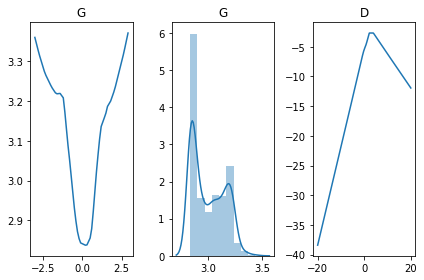

[Epoch 5204/10000] [D loss: -0.999782] [G loss: 2.656819]
[Epoch 5208/10000] [D loss: -0.999612] [G loss: 2.682570]
[Epoch 5212/10000] [D loss: -0.999955] [G loss: 2.725094]
[Epoch 5216/10000] [D loss: -0.999723] [G loss: 2.688377]
[Epoch 5220/10000] [D loss: -0.999684] [G loss: 2.695838]
[Epoch 5224/10000] [D loss: -0.999462] [G loss: 2.702714]
[Epoch 5228/10000] [D loss: -0.999721] [G loss: 2.675162]
[Epoch 5232/10000] [D loss: -0.999776] [G loss: 2.674035]
[Epoch 5236/10000] [D loss: -0.999665] [G loss: 2.687760]
[Epoch 5240/10000] [D loss: -0.999847] [G loss: 2.683173]
[Epoch 5244/10000] [D loss: -0.999591] [G loss: 2.665896]
[Epoch 5248/10000] [D loss: -0.999384] [G loss: 2.713357]
[Epoch 5252/10000] [D loss: -0.999647] [G loss: 2.690996]
[Epoch 5256/10000] [D loss: -0.999927] [G loss: 2.650168]
[Epoch 5260/10000] [D loss: -0.999753] [G loss: 2.705023]
[Epoch 5264/10000] [D loss: -0.999660] [G loss: 2.713611]
[Epoch 5268/10000] [D loss: -0.999388] [G loss: 2.666055]
[Epoch 5272/10

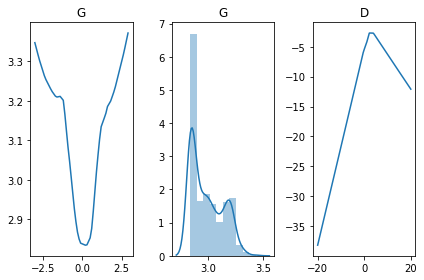

[Epoch 5304/10000] [D loss: -0.999944] [G loss: 2.718570]
[Epoch 5308/10000] [D loss: -0.999700] [G loss: 2.682694]
[Epoch 5312/10000] [D loss: -0.999248] [G loss: 2.641645]
[Epoch 5316/10000] [D loss: -0.999190] [G loss: 2.678606]
[Epoch 5320/10000] [D loss: -0.999857] [G loss: 2.663499]
[Epoch 5324/10000] [D loss: -0.999984] [G loss: 2.703235]
[Epoch 5328/10000] [D loss: -0.999532] [G loss: 2.701245]
[Epoch 5332/10000] [D loss: -0.999979] [G loss: 2.731989]
[Epoch 5336/10000] [D loss: -0.999715] [G loss: 2.675362]
[Epoch 5340/10000] [D loss: -0.999957] [G loss: 2.660033]
[Epoch 5344/10000] [D loss: -0.999831] [G loss: 2.698751]
[Epoch 5348/10000] [D loss: -0.999603] [G loss: 2.673118]
[Epoch 5352/10000] [D loss: -0.999740] [G loss: 2.648272]
[Epoch 5356/10000] [D loss: -0.999649] [G loss: 2.684026]
[Epoch 5360/10000] [D loss: -0.999369] [G loss: 2.674358]
[Epoch 5364/10000] [D loss: -0.999974] [G loss: 2.692361]
[Epoch 5368/10000] [D loss: -0.999515] [G loss: 2.689373]
[Epoch 5372/10

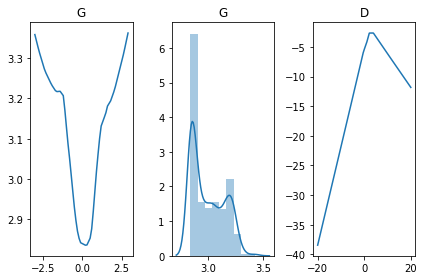

[Epoch 5404/10000] [D loss: -0.999292] [G loss: 2.671711]
[Epoch 5408/10000] [D loss: -0.999728] [G loss: 2.668485]
[Epoch 5412/10000] [D loss: -0.999968] [G loss: 2.665943]
[Epoch 5416/10000] [D loss: -0.999486] [G loss: 2.694854]
[Epoch 5420/10000] [D loss: -0.999478] [G loss: 2.697767]
[Epoch 5424/10000] [D loss: -0.999510] [G loss: 2.705633]
[Epoch 5428/10000] [D loss: -0.999891] [G loss: 2.654994]
[Epoch 5432/10000] [D loss: -0.999393] [G loss: 2.692339]
[Epoch 5436/10000] [D loss: -0.999574] [G loss: 2.682170]
[Epoch 5440/10000] [D loss: -0.999727] [G loss: 2.697355]
[Epoch 5444/10000] [D loss: -0.999772] [G loss: 2.691485]
[Epoch 5448/10000] [D loss: -0.999432] [G loss: 2.688870]
[Epoch 5452/10000] [D loss: -0.999888] [G loss: 2.709348]
[Epoch 5456/10000] [D loss: -0.999508] [G loss: 2.672368]
[Epoch 5460/10000] [D loss: -0.999379] [G loss: 2.654837]
[Epoch 5464/10000] [D loss: -0.999746] [G loss: 2.683677]
[Epoch 5468/10000] [D loss: -0.999890] [G loss: 2.672563]
[Epoch 5472/10

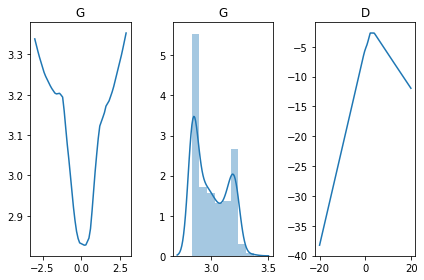

[Epoch 5504/10000] [D loss: -0.999686] [G loss: 2.693548]
[Epoch 5508/10000] [D loss: -0.999912] [G loss: 2.658017]
[Epoch 5512/10000] [D loss: -0.999420] [G loss: 2.670975]
[Epoch 5516/10000] [D loss: -0.999849] [G loss: 2.701185]
[Epoch 5520/10000] [D loss: -0.999819] [G loss: 2.679770]
[Epoch 5524/10000] [D loss: -0.999878] [G loss: 2.669451]
[Epoch 5528/10000] [D loss: -0.999495] [G loss: 2.633622]
[Epoch 5532/10000] [D loss: -0.999966] [G loss: 2.708191]
[Epoch 5536/10000] [D loss: -0.999940] [G loss: 2.715496]
[Epoch 5540/10000] [D loss: -0.999414] [G loss: 2.673866]
[Epoch 5544/10000] [D loss: -0.999834] [G loss: 2.664480]
[Epoch 5548/10000] [D loss: -0.999989] [G loss: 2.701101]
[Epoch 5552/10000] [D loss: -0.999351] [G loss: 2.665585]
[Epoch 5556/10000] [D loss: -0.999938] [G loss: 2.637943]
[Epoch 5560/10000] [D loss: -0.999563] [G loss: 2.686775]
[Epoch 5564/10000] [D loss: -0.999615] [G loss: 2.680918]
[Epoch 5568/10000] [D loss: -0.999674] [G loss: 2.690530]
[Epoch 5572/10

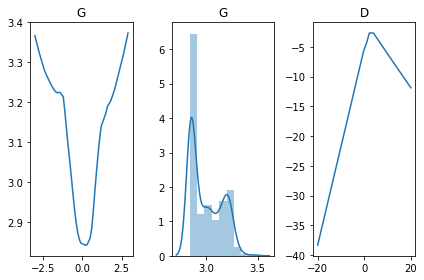

[Epoch 5604/10000] [D loss: -0.999825] [G loss: 2.646736]
[Epoch 5608/10000] [D loss: -0.999720] [G loss: 2.664105]
[Epoch 5612/10000] [D loss: -0.999258] [G loss: 2.689867]
[Epoch 5616/10000] [D loss: -0.999376] [G loss: 2.729040]
[Epoch 5620/10000] [D loss: -0.999954] [G loss: 2.718242]
[Epoch 5624/10000] [D loss: -0.999787] [G loss: 2.689230]
[Epoch 5628/10000] [D loss: -0.999315] [G loss: 2.688547]
[Epoch 5632/10000] [D loss: -0.998937] [G loss: 2.662607]
[Epoch 5636/10000] [D loss: -0.999716] [G loss: 2.660312]
[Epoch 5640/10000] [D loss: -0.999527] [G loss: 2.653320]
[Epoch 5644/10000] [D loss: -0.999303] [G loss: 2.633059]
[Epoch 5648/10000] [D loss: -0.999433] [G loss: 2.680600]
[Epoch 5652/10000] [D loss: -0.999616] [G loss: 2.693058]
[Epoch 5656/10000] [D loss: -0.999482] [G loss: 2.698215]
[Epoch 5660/10000] [D loss: -0.999592] [G loss: 2.680242]
[Epoch 5664/10000] [D loss: -0.999684] [G loss: 2.654177]
[Epoch 5668/10000] [D loss: -0.999512] [G loss: 2.676155]
[Epoch 5672/10

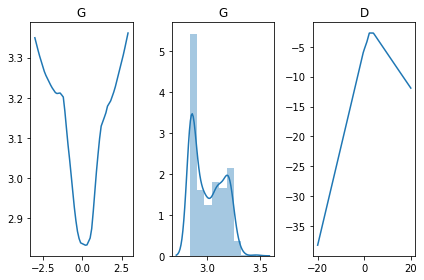

[Epoch 5704/10000] [D loss: -0.999803] [G loss: 2.675166]
[Epoch 5708/10000] [D loss: -0.999799] [G loss: 2.674178]
[Epoch 5712/10000] [D loss: -0.999592] [G loss: 2.624902]
[Epoch 5716/10000] [D loss: -0.999850] [G loss: 2.693493]
[Epoch 5720/10000] [D loss: -0.999394] [G loss: 2.665613]
[Epoch 5724/10000] [D loss: -0.999967] [G loss: 2.663394]
[Epoch 5728/10000] [D loss: -0.999711] [G loss: 2.669802]
[Epoch 5732/10000] [D loss: -0.999847] [G loss: 2.662599]
[Epoch 5736/10000] [D loss: -0.999976] [G loss: 2.656001]
[Epoch 5740/10000] [D loss: -0.999374] [G loss: 2.717433]
[Epoch 5744/10000] [D loss: -0.999583] [G loss: 2.705268]
[Epoch 5748/10000] [D loss: -0.999795] [G loss: 2.699977]
[Epoch 5752/10000] [D loss: -0.999932] [G loss: 2.665021]
[Epoch 5756/10000] [D loss: -0.999836] [G loss: 2.663240]
[Epoch 5760/10000] [D loss: -0.999455] [G loss: 2.662965]
[Epoch 5764/10000] [D loss: -0.999893] [G loss: 2.708874]
[Epoch 5768/10000] [D loss: -0.999149] [G loss: 2.676927]
[Epoch 5772/10

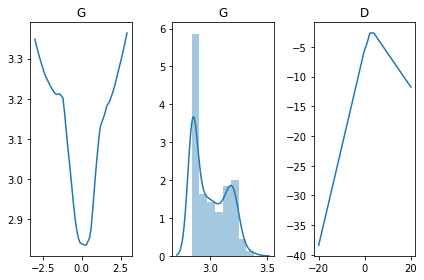

[Epoch 5804/10000] [D loss: -0.999670] [G loss: 2.656003]
[Epoch 5808/10000] [D loss: -0.999733] [G loss: 2.647002]
[Epoch 5812/10000] [D loss: -0.999774] [G loss: 2.655097]
[Epoch 5816/10000] [D loss: -0.999619] [G loss: 2.662019]
[Epoch 5820/10000] [D loss: -0.999768] [G loss: 2.667249]
[Epoch 5824/10000] [D loss: -0.999444] [G loss: 2.680523]
[Epoch 5828/10000] [D loss: -0.999893] [G loss: 2.709072]
[Epoch 5832/10000] [D loss: -0.999795] [G loss: 2.678698]
[Epoch 5836/10000] [D loss: -0.999644] [G loss: 2.683656]
[Epoch 5840/10000] [D loss: -0.999802] [G loss: 2.685295]
[Epoch 5844/10000] [D loss: -0.999988] [G loss: 2.631251]
[Epoch 5848/10000] [D loss: -0.999580] [G loss: 2.665475]
[Epoch 5852/10000] [D loss: -0.999061] [G loss: 2.687194]
[Epoch 5856/10000] [D loss: -0.999934] [G loss: 2.705768]
[Epoch 5860/10000] [D loss: -0.999942] [G loss: 2.646689]
[Epoch 5864/10000] [D loss: -0.999906] [G loss: 2.691076]
[Epoch 5868/10000] [D loss: -0.999454] [G loss: 2.673394]
[Epoch 5872/10

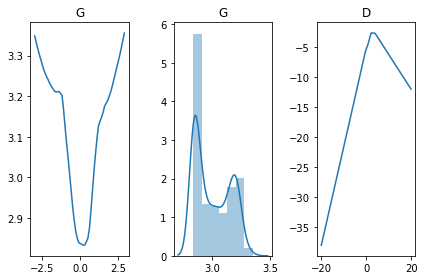

[Epoch 5904/10000] [D loss: -0.999675] [G loss: 2.657551]
[Epoch 5908/10000] [D loss: -0.999995] [G loss: 2.644084]
[Epoch 5912/10000] [D loss: -0.999945] [G loss: 2.657434]
[Epoch 5916/10000] [D loss: -0.999985] [G loss: 2.715228]
[Epoch 5920/10000] [D loss: -0.999880] [G loss: 2.630913]
[Epoch 5924/10000] [D loss: -0.999863] [G loss: 2.684952]
[Epoch 5928/10000] [D loss: -0.999581] [G loss: 2.657138]
[Epoch 5932/10000] [D loss: -0.999764] [G loss: 2.669042]
[Epoch 5936/10000] [D loss: -0.999915] [G loss: 2.666027]
[Epoch 5940/10000] [D loss: -0.999590] [G loss: 2.656981]
[Epoch 5944/10000] [D loss: -0.999862] [G loss: 2.679800]
[Epoch 5948/10000] [D loss: -0.999858] [G loss: 2.685682]
[Epoch 5952/10000] [D loss: -0.999154] [G loss: 2.683513]
[Epoch 5956/10000] [D loss: -0.999835] [G loss: 2.647614]
[Epoch 5960/10000] [D loss: -0.999433] [G loss: 2.656765]
[Epoch 5964/10000] [D loss: -0.999663] [G loss: 2.640330]
[Epoch 5968/10000] [D loss: -0.999027] [G loss: 2.703696]
[Epoch 5972/10

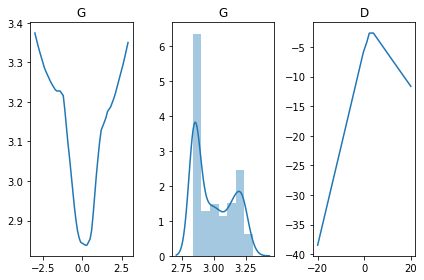

[Epoch 6004/10000] [D loss: -0.999685] [G loss: 2.673674]
[Epoch 6008/10000] [D loss: -0.999920] [G loss: 2.668651]
[Epoch 6012/10000] [D loss: -0.999841] [G loss: 2.686666]
[Epoch 6016/10000] [D loss: -0.999851] [G loss: 2.679816]
[Epoch 6020/10000] [D loss: -0.999410] [G loss: 2.683421]
[Epoch 6024/10000] [D loss: -0.999986] [G loss: 2.630933]
[Epoch 6028/10000] [D loss: -0.999761] [G loss: 2.644782]
[Epoch 6032/10000] [D loss: -0.999223] [G loss: 2.675674]
[Epoch 6036/10000] [D loss: -0.999931] [G loss: 2.708111]
[Epoch 6040/10000] [D loss: -0.999955] [G loss: 2.648880]
[Epoch 6044/10000] [D loss: -0.999705] [G loss: 2.656749]
[Epoch 6048/10000] [D loss: -0.999834] [G loss: 2.651665]
[Epoch 6052/10000] [D loss: -0.999419] [G loss: 2.658779]
[Epoch 6056/10000] [D loss: -0.999821] [G loss: 2.641670]
[Epoch 6060/10000] [D loss: -0.999864] [G loss: 2.634751]
[Epoch 6064/10000] [D loss: -0.999430] [G loss: 2.677157]
[Epoch 6068/10000] [D loss: -0.999777] [G loss: 2.727284]
[Epoch 6072/10

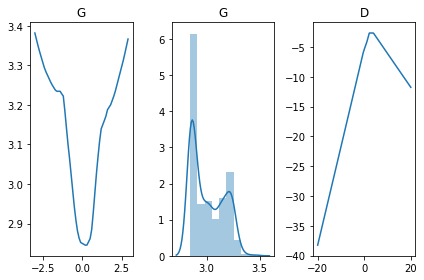

[Epoch 6104/10000] [D loss: -0.999928] [G loss: 2.660349]
[Epoch 6108/10000] [D loss: -0.999946] [G loss: 2.635873]
[Epoch 6112/10000] [D loss: -0.999818] [G loss: 2.669876]
[Epoch 6116/10000] [D loss: -0.999885] [G loss: 2.682598]
[Epoch 6120/10000] [D loss: -0.999841] [G loss: 2.678282]
[Epoch 6124/10000] [D loss: -0.999955] [G loss: 2.635008]
[Epoch 6128/10000] [D loss: -0.999432] [G loss: 2.686119]
[Epoch 6132/10000] [D loss: -0.999782] [G loss: 2.650005]
[Epoch 6136/10000] [D loss: -0.999766] [G loss: 2.645995]
[Epoch 6140/10000] [D loss: -0.999132] [G loss: 2.703944]
[Epoch 6144/10000] [D loss: -0.999580] [G loss: 2.698349]
[Epoch 6148/10000] [D loss: -0.999309] [G loss: 2.653034]
[Epoch 6152/10000] [D loss: -0.999643] [G loss: 2.667493]
[Epoch 6156/10000] [D loss: -0.999818] [G loss: 2.636277]
[Epoch 6160/10000] [D loss: -0.999635] [G loss: 2.683588]
[Epoch 6164/10000] [D loss: -0.999914] [G loss: 2.679149]
[Epoch 6168/10000] [D loss: -0.999634] [G loss: 2.687014]
[Epoch 6172/10

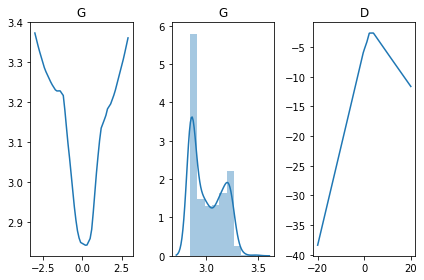

[Epoch 6204/10000] [D loss: -0.999448] [G loss: 2.690668]
[Epoch 6208/10000] [D loss: -0.999320] [G loss: 2.710380]
[Epoch 6212/10000] [D loss: -0.999560] [G loss: 2.637510]
[Epoch 6216/10000] [D loss: -0.999707] [G loss: 2.644600]
[Epoch 6220/10000] [D loss: -0.999828] [G loss: 2.650404]
[Epoch 6224/10000] [D loss: -0.999839] [G loss: 2.658037]
[Epoch 6228/10000] [D loss: -0.999452] [G loss: 2.657517]
[Epoch 6232/10000] [D loss: -0.999865] [G loss: 2.663575]
[Epoch 6236/10000] [D loss: -0.999804] [G loss: 2.675718]
[Epoch 6240/10000] [D loss: -0.999644] [G loss: 2.687104]
[Epoch 6244/10000] [D loss: -0.999809] [G loss: 2.648712]
[Epoch 6248/10000] [D loss: -0.999706] [G loss: 2.658565]
[Epoch 6252/10000] [D loss: -0.999209] [G loss: 2.660764]
[Epoch 6256/10000] [D loss: -0.999612] [G loss: 2.661900]
[Epoch 6260/10000] [D loss: -0.999930] [G loss: 2.611538]
[Epoch 6264/10000] [D loss: -0.999490] [G loss: 2.679172]
[Epoch 6268/10000] [D loss: -0.999952] [G loss: 2.696462]
[Epoch 6272/10

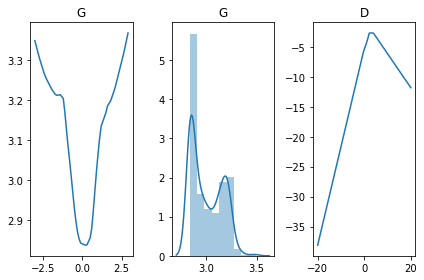

[Epoch 6304/10000] [D loss: -0.999550] [G loss: 2.677819]
[Epoch 6308/10000] [D loss: -0.999885] [G loss: 2.656570]
[Epoch 6312/10000] [D loss: -0.999434] [G loss: 2.643485]
[Epoch 6316/10000] [D loss: -0.999554] [G loss: 2.666710]
[Epoch 6320/10000] [D loss: -0.999625] [G loss: 2.652465]
[Epoch 6324/10000] [D loss: -0.999426] [G loss: 2.640203]
[Epoch 6328/10000] [D loss: -0.999700] [G loss: 2.656543]
[Epoch 6332/10000] [D loss: -0.999154] [G loss: 2.649397]
[Epoch 6336/10000] [D loss: -0.999954] [G loss: 2.669462]
[Epoch 6340/10000] [D loss: -0.999245] [G loss: 2.692722]
[Epoch 6344/10000] [D loss: -0.999576] [G loss: 2.644011]
[Epoch 6348/10000] [D loss: -0.999906] [G loss: 2.694580]
[Epoch 6352/10000] [D loss: -0.999902] [G loss: 2.680279]
[Epoch 6356/10000] [D loss: -0.999775] [G loss: 2.668431]
[Epoch 6360/10000] [D loss: -0.999984] [G loss: 2.618479]
[Epoch 6364/10000] [D loss: -0.999910] [G loss: 2.706138]
[Epoch 6368/10000] [D loss: -0.999273] [G loss: 2.621731]
[Epoch 6372/10

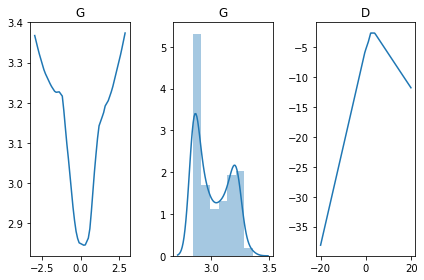

[Epoch 6404/10000] [D loss: -0.999898] [G loss: 2.650951]
[Epoch 6408/10000] [D loss: -0.999722] [G loss: 2.659179]
[Epoch 6412/10000] [D loss: -0.999463] [G loss: 2.691398]
[Epoch 6416/10000] [D loss: -0.999831] [G loss: 2.690816]
[Epoch 6420/10000] [D loss: -0.999847] [G loss: 2.636104]
[Epoch 6424/10000] [D loss: -0.999864] [G loss: 2.621518]
[Epoch 6428/10000] [D loss: -0.999840] [G loss: 2.630705]
[Epoch 6432/10000] [D loss: -0.999284] [G loss: 2.655540]
[Epoch 6436/10000] [D loss: -0.999714] [G loss: 2.668774]
[Epoch 6440/10000] [D loss: -0.999901] [G loss: 2.682018]
[Epoch 6444/10000] [D loss: -0.999795] [G loss: 2.654715]
[Epoch 6448/10000] [D loss: -0.999856] [G loss: 2.624441]
[Epoch 6452/10000] [D loss: -0.999902] [G loss: 2.653229]
[Epoch 6456/10000] [D loss: -0.999870] [G loss: 2.675140]
[Epoch 6460/10000] [D loss: -0.999780] [G loss: 2.666780]
[Epoch 6464/10000] [D loss: -0.999878] [G loss: 2.674736]
[Epoch 6468/10000] [D loss: -0.999999] [G loss: 2.643052]
[Epoch 6472/10

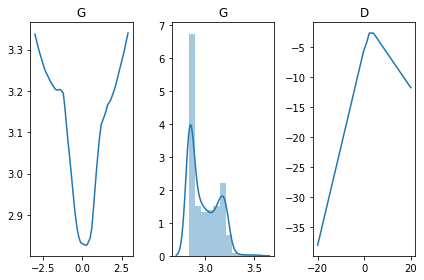

[Epoch 6504/10000] [D loss: -0.999615] [G loss: 2.632565]
[Epoch 6508/10000] [D loss: -0.999864] [G loss: 2.644213]
[Epoch 6512/10000] [D loss: -0.999459] [G loss: 2.637871]
[Epoch 6516/10000] [D loss: -0.999445] [G loss: 2.608772]
[Epoch 6520/10000] [D loss: -0.999808] [G loss: 2.618715]
[Epoch 6524/10000] [D loss: -0.999679] [G loss: 2.639757]
[Epoch 6528/10000] [D loss: -0.999430] [G loss: 2.679078]
[Epoch 6532/10000] [D loss: -0.999593] [G loss: 2.655246]
[Epoch 6536/10000] [D loss: -0.999787] [G loss: 2.679587]
[Epoch 6540/10000] [D loss: -0.999629] [G loss: 2.675641]
[Epoch 6544/10000] [D loss: -0.999964] [G loss: 2.634706]
[Epoch 6548/10000] [D loss: -0.999672] [G loss: 2.644978]
[Epoch 6552/10000] [D loss: -0.999697] [G loss: 2.656390]
[Epoch 6556/10000] [D loss: -0.999561] [G loss: 2.672446]
[Epoch 6560/10000] [D loss: -0.999359] [G loss: 2.667886]
[Epoch 6564/10000] [D loss: -0.999719] [G loss: 2.664125]
[Epoch 6568/10000] [D loss: -0.999769] [G loss: 2.639751]
[Epoch 6572/10

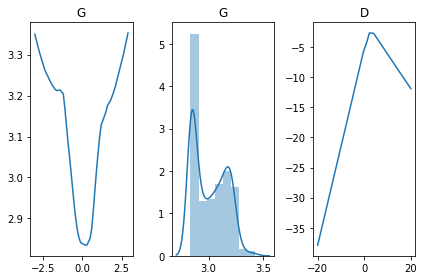

[Epoch 6604/10000] [D loss: -0.999228] [G loss: 2.649222]
[Epoch 6608/10000] [D loss: -0.999928] [G loss: 2.664273]
[Epoch 6612/10000] [D loss: -0.999916] [G loss: 2.647791]
[Epoch 6616/10000] [D loss: -0.999777] [G loss: 2.627001]
[Epoch 6620/10000] [D loss: -0.999386] [G loss: 2.635475]
[Epoch 6624/10000] [D loss: -0.999137] [G loss: 2.642207]
[Epoch 6628/10000] [D loss: -0.999686] [G loss: 2.645012]
[Epoch 6632/10000] [D loss: -0.999852] [G loss: 2.695738]
[Epoch 6636/10000] [D loss: -0.999200] [G loss: 2.610084]
[Epoch 6640/10000] [D loss: -0.999473] [G loss: 2.659208]
[Epoch 6644/10000] [D loss: -0.999955] [G loss: 2.681764]
[Epoch 6648/10000] [D loss: -0.999951] [G loss: 2.631588]
[Epoch 6652/10000] [D loss: -0.999917] [G loss: 2.676278]
[Epoch 6656/10000] [D loss: -0.999367] [G loss: 2.640844]
[Epoch 6660/10000] [D loss: -0.999662] [G loss: 2.636756]
[Epoch 6664/10000] [D loss: -0.999503] [G loss: 2.630044]
[Epoch 6668/10000] [D loss: -0.999740] [G loss: 2.645210]
[Epoch 6672/10

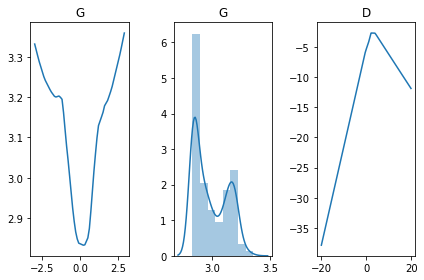

[Epoch 6704/10000] [D loss: -0.999669] [G loss: 2.630575]
[Epoch 6708/10000] [D loss: -0.999534] [G loss: 2.624475]
[Epoch 6712/10000] [D loss: -0.998899] [G loss: 2.684131]
[Epoch 6716/10000] [D loss: -0.999734] [G loss: 2.643502]
[Epoch 6720/10000] [D loss: -0.999188] [G loss: 2.595398]
[Epoch 6724/10000] [D loss: -0.999882] [G loss: 2.644873]
[Epoch 6728/10000] [D loss: -0.999891] [G loss: 2.664021]
[Epoch 6732/10000] [D loss: -0.999898] [G loss: 2.666725]
[Epoch 6736/10000] [D loss: -0.999851] [G loss: 2.656364]
[Epoch 6740/10000] [D loss: -0.999827] [G loss: 2.639426]
[Epoch 6744/10000] [D loss: -0.999865] [G loss: 2.659758]
[Epoch 6748/10000] [D loss: -0.999735] [G loss: 2.645442]
[Epoch 6752/10000] [D loss: -0.999116] [G loss: 2.616695]
[Epoch 6756/10000] [D loss: -0.999324] [G loss: 2.628376]
[Epoch 6760/10000] [D loss: -0.999806] [G loss: 2.627602]
[Epoch 6764/10000] [D loss: -0.999701] [G loss: 2.664018]
[Epoch 6768/10000] [D loss: -0.999689] [G loss: 2.653811]
[Epoch 6772/10

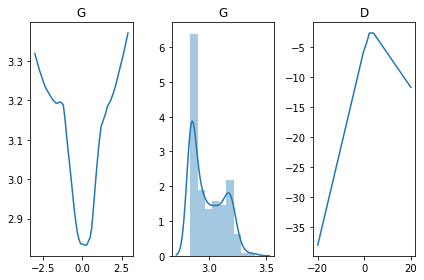

[Epoch 6804/10000] [D loss: -0.999709] [G loss: 2.647529]
[Epoch 6808/10000] [D loss: -0.999350] [G loss: 2.672795]
[Epoch 6812/10000] [D loss: -0.999581] [G loss: 2.643651]
[Epoch 6816/10000] [D loss: -0.999897] [G loss: 2.652871]
[Epoch 6820/10000] [D loss: -0.999403] [G loss: 2.638184]
[Epoch 6824/10000] [D loss: -0.999410] [G loss: 2.642088]
[Epoch 6828/10000] [D loss: -0.999797] [G loss: 2.610669]
[Epoch 6832/10000] [D loss: -0.999940] [G loss: 2.657406]
[Epoch 6836/10000] [D loss: -0.999657] [G loss: 2.626230]
[Epoch 6840/10000] [D loss: -0.999946] [G loss: 2.608554]
[Epoch 6844/10000] [D loss: -0.999944] [G loss: 2.612724]
[Epoch 6848/10000] [D loss: -0.999189] [G loss: 2.643531]
[Epoch 6852/10000] [D loss: -0.999684] [G loss: 2.646878]
[Epoch 6856/10000] [D loss: -0.999485] [G loss: 2.706969]
[Epoch 6860/10000] [D loss: -0.999759] [G loss: 2.664054]
[Epoch 6864/10000] [D loss: -0.999765] [G loss: 2.652476]
[Epoch 6868/10000] [D loss: -0.999481] [G loss: 2.645293]
[Epoch 6872/10

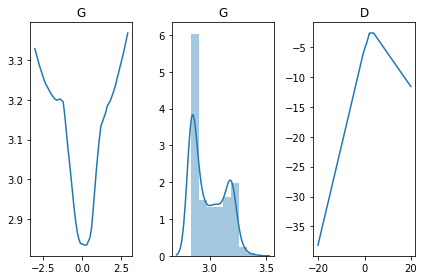

[Epoch 6904/10000] [D loss: -0.999922] [G loss: 2.617265]
[Epoch 6908/10000] [D loss: -0.999992] [G loss: 2.664570]
[Epoch 6912/10000] [D loss: -0.999336] [G loss: 2.634236]
[Epoch 6916/10000] [D loss: -0.999961] [G loss: 2.661953]
[Epoch 6920/10000] [D loss: -0.999791] [G loss: 2.674686]
[Epoch 6924/10000] [D loss: -0.999987] [G loss: 2.619014]
[Epoch 6928/10000] [D loss: -0.999564] [G loss: 2.616371]
[Epoch 6932/10000] [D loss: -0.999795] [G loss: 2.651779]
[Epoch 6936/10000] [D loss: -0.999313] [G loss: 2.657700]
[Epoch 6940/10000] [D loss: -0.999987] [G loss: 2.626258]
[Epoch 6944/10000] [D loss: -0.999706] [G loss: 2.617700]
[Epoch 6948/10000] [D loss: -0.999277] [G loss: 2.652930]
[Epoch 6952/10000] [D loss: -0.999686] [G loss: 2.667936]
[Epoch 6956/10000] [D loss: -0.999526] [G loss: 2.662540]
[Epoch 6960/10000] [D loss: -0.999532] [G loss: 2.658363]
[Epoch 6964/10000] [D loss: -0.999611] [G loss: 2.651685]
[Epoch 6968/10000] [D loss: -0.999857] [G loss: 2.626646]
[Epoch 6972/10

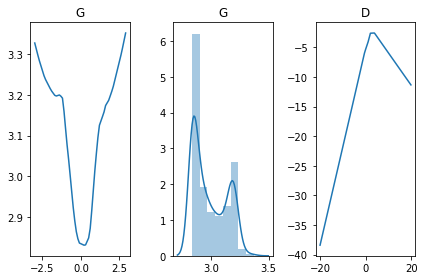

[Epoch 7004/10000] [D loss: -0.999886] [G loss: 2.640175]
[Epoch 7008/10000] [D loss: -0.999570] [G loss: 2.626073]
[Epoch 7012/10000] [D loss: -0.999442] [G loss: 2.627841]
[Epoch 7016/10000] [D loss: -0.999307] [G loss: 2.626865]
[Epoch 7020/10000] [D loss: -0.999419] [G loss: 2.633557]
[Epoch 7024/10000] [D loss: -0.999154] [G loss: 2.618376]
[Epoch 7028/10000] [D loss: -0.999454] [G loss: 2.631488]
[Epoch 7032/10000] [D loss: -0.999701] [G loss: 2.623874]
[Epoch 7036/10000] [D loss: -0.999932] [G loss: 2.665497]
[Epoch 7040/10000] [D loss: -0.999749] [G loss: 2.669019]
[Epoch 7044/10000] [D loss: -0.999278] [G loss: 2.617884]
[Epoch 7048/10000] [D loss: -0.999843] [G loss: 2.622209]
[Epoch 7052/10000] [D loss: -0.999517] [G loss: 2.644266]
[Epoch 7056/10000] [D loss: -0.999371] [G loss: 2.664824]
[Epoch 7060/10000] [D loss: -0.999778] [G loss: 2.633429]
[Epoch 7064/10000] [D loss: -0.999627] [G loss: 2.634772]
[Epoch 7068/10000] [D loss: -0.999903] [G loss: 2.668755]
[Epoch 7072/10

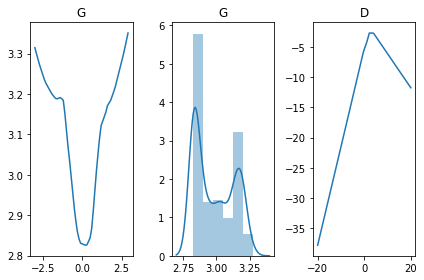

[Epoch 7104/10000] [D loss: -0.999945] [G loss: 2.608759]
[Epoch 7108/10000] [D loss: -0.999590] [G loss: 2.619484]
[Epoch 7112/10000] [D loss: -0.999788] [G loss: 2.649682]
[Epoch 7116/10000] [D loss: -0.999981] [G loss: 2.610543]
[Epoch 7120/10000] [D loss: -0.999600] [G loss: 2.619039]
[Epoch 7124/10000] [D loss: -0.999935] [G loss: 2.682346]
[Epoch 7128/10000] [D loss: -0.999791] [G loss: 2.633904]
[Epoch 7132/10000] [D loss: -0.999392] [G loss: 2.578329]
[Epoch 7136/10000] [D loss: -0.999793] [G loss: 2.652025]
[Epoch 7140/10000] [D loss: -0.999568] [G loss: 2.623482]
[Epoch 7144/10000] [D loss: -0.999756] [G loss: 2.658014]
[Epoch 7148/10000] [D loss: -0.999663] [G loss: 2.622509]
[Epoch 7152/10000] [D loss: -0.999920] [G loss: 2.655511]
[Epoch 7156/10000] [D loss: -0.999647] [G loss: 2.666045]
[Epoch 7160/10000] [D loss: -0.999900] [G loss: 2.648949]
[Epoch 7164/10000] [D loss: -0.999716] [G loss: 2.637257]
[Epoch 7168/10000] [D loss: -0.999553] [G loss: 2.656818]
[Epoch 7172/10

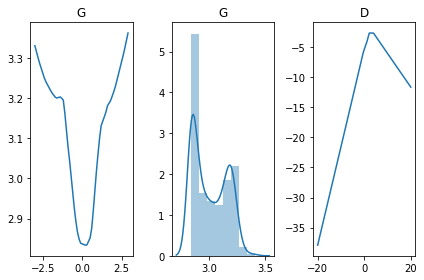

[Epoch 7204/10000] [D loss: -0.999980] [G loss: 2.634672]
[Epoch 7208/10000] [D loss: -0.999385] [G loss: 2.604235]
[Epoch 7212/10000] [D loss: -0.999707] [G loss: 2.639891]
[Epoch 7216/10000] [D loss: -0.999215] [G loss: 2.658480]
[Epoch 7220/10000] [D loss: -0.999988] [G loss: 2.662589]
[Epoch 7224/10000] [D loss: -0.999178] [G loss: 2.622907]
[Epoch 7228/10000] [D loss: -0.999627] [G loss: 2.597045]
[Epoch 7232/10000] [D loss: -0.999223] [G loss: 2.633667]
[Epoch 7236/10000] [D loss: -0.999995] [G loss: 2.608802]
[Epoch 7240/10000] [D loss: -0.998989] [G loss: 2.620165]
[Epoch 7244/10000] [D loss: -0.999429] [G loss: 2.618424]
[Epoch 7248/10000] [D loss: -0.999323] [G loss: 2.624337]
[Epoch 7252/10000] [D loss: -0.999849] [G loss: 2.640348]
[Epoch 7256/10000] [D loss: -0.999500] [G loss: 2.661983]
[Epoch 7260/10000] [D loss: -0.999077] [G loss: 2.605225]
[Epoch 7264/10000] [D loss: -0.999982] [G loss: 2.590164]
[Epoch 7268/10000] [D loss: -0.999640] [G loss: 2.620103]
[Epoch 7272/10

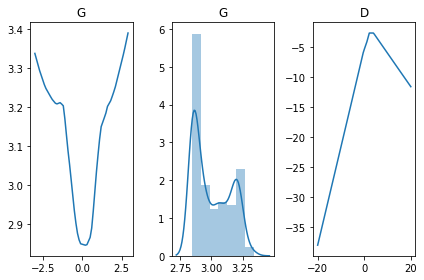

[Epoch 7304/10000] [D loss: -0.999234] [G loss: 2.681581]
[Epoch 7308/10000] [D loss: -0.999777] [G loss: 2.661239]
[Epoch 7312/10000] [D loss: -0.999792] [G loss: 2.647468]
[Epoch 7316/10000] [D loss: -0.999899] [G loss: 2.657449]
[Epoch 7320/10000] [D loss: -0.999280] [G loss: 2.589072]
[Epoch 7324/10000] [D loss: -0.999940] [G loss: 2.576102]
[Epoch 7328/10000] [D loss: -0.999640] [G loss: 2.620954]
[Epoch 7332/10000] [D loss: -0.999610] [G loss: 2.607612]
[Epoch 7336/10000] [D loss: -0.999621] [G loss: 2.636553]
[Epoch 7340/10000] [D loss: -0.999962] [G loss: 2.619804]
[Epoch 7344/10000] [D loss: -0.999894] [G loss: 2.624430]
[Epoch 7348/10000] [D loss: -0.999998] [G loss: 2.590358]
[Epoch 7352/10000] [D loss: -0.999857] [G loss: 2.620370]
[Epoch 7356/10000] [D loss: -0.999407] [G loss: 2.640542]
[Epoch 7360/10000] [D loss: -0.999805] [G loss: 2.655553]
[Epoch 7364/10000] [D loss: -0.999504] [G loss: 2.624918]
[Epoch 7368/10000] [D loss: -0.999657] [G loss: 2.612852]
[Epoch 7372/10

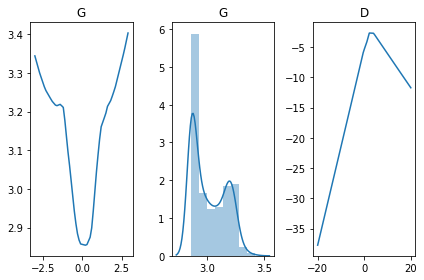

[Epoch 7404/10000] [D loss: -0.999983] [G loss: 2.607259]
[Epoch 7408/10000] [D loss: -0.999525] [G loss: 2.622012]
[Epoch 7412/10000] [D loss: -0.999757] [G loss: 2.605131]
[Epoch 7416/10000] [D loss: -0.999370] [G loss: 2.637301]
[Epoch 7420/10000] [D loss: -0.999903] [G loss: 2.624953]
[Epoch 7424/10000] [D loss: -0.999917] [G loss: 2.668269]
[Epoch 7428/10000] [D loss: -0.999682] [G loss: 2.627151]
[Epoch 7432/10000] [D loss: -0.999604] [G loss: 2.632246]
[Epoch 7436/10000] [D loss: -0.999984] [G loss: 2.609212]
[Epoch 7440/10000] [D loss: -0.999628] [G loss: 2.639646]
[Epoch 7444/10000] [D loss: -0.999870] [G loss: 2.636998]
[Epoch 7448/10000] [D loss: -0.999864] [G loss: 2.670442]
[Epoch 7452/10000] [D loss: -0.999913] [G loss: 2.611483]
[Epoch 7456/10000] [D loss: -0.999645] [G loss: 2.641692]
[Epoch 7460/10000] [D loss: -0.999774] [G loss: 2.633806]
[Epoch 7464/10000] [D loss: -0.999937] [G loss: 2.589655]
[Epoch 7468/10000] [D loss: -0.999982] [G loss: 2.664016]
[Epoch 7472/10

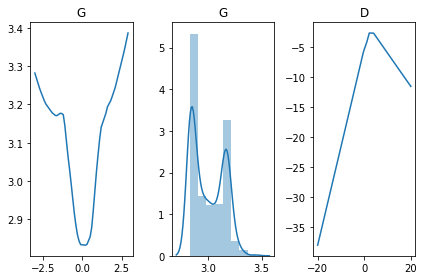

[Epoch 7504/10000] [D loss: -0.999646] [G loss: 2.615419]
[Epoch 7508/10000] [D loss: -0.999675] [G loss: 2.640174]
[Epoch 7512/10000] [D loss: -0.998869] [G loss: 2.575162]
[Epoch 7516/10000] [D loss: -0.999870] [G loss: 2.626052]
[Epoch 7520/10000] [D loss: -0.999800] [G loss: 2.638206]
[Epoch 7524/10000] [D loss: -0.999354] [G loss: 2.614753]
[Epoch 7528/10000] [D loss: -0.999976] [G loss: 2.658476]
[Epoch 7532/10000] [D loss: -0.999380] [G loss: 2.608439]
[Epoch 7536/10000] [D loss: -0.998950] [G loss: 2.571386]
[Epoch 7540/10000] [D loss: -0.999914] [G loss: 2.641752]
[Epoch 7544/10000] [D loss: -0.999652] [G loss: 2.620095]
[Epoch 7548/10000] [D loss: -0.999232] [G loss: 2.585999]
[Epoch 7552/10000] [D loss: -0.999602] [G loss: 2.630349]
[Epoch 7556/10000] [D loss: -0.999810] [G loss: 2.621695]
[Epoch 7560/10000] [D loss: -0.999351] [G loss: 2.610725]
[Epoch 7564/10000] [D loss: -0.999717] [G loss: 2.629071]
[Epoch 7568/10000] [D loss: -0.999838] [G loss: 2.656538]
[Epoch 7572/10

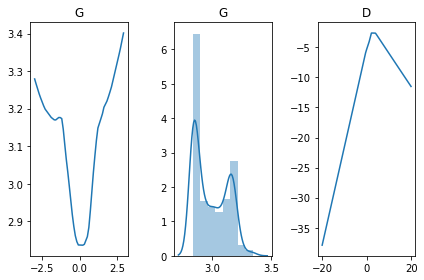

[Epoch 7604/10000] [D loss: -0.999534] [G loss: 2.615400]
[Epoch 7608/10000] [D loss: -0.999923] [G loss: 2.644910]
[Epoch 7612/10000] [D loss: -0.999571] [G loss: 2.609311]
[Epoch 7616/10000] [D loss: -0.999892] [G loss: 2.591572]
[Epoch 7620/10000] [D loss: -0.999047] [G loss: 2.634968]
[Epoch 7624/10000] [D loss: -0.999963] [G loss: 2.668573]
[Epoch 7628/10000] [D loss: -0.999425] [G loss: 2.594952]
[Epoch 7632/10000] [D loss: -0.999727] [G loss: 2.606302]
[Epoch 7636/10000] [D loss: -0.999655] [G loss: 2.581857]
[Epoch 7640/10000] [D loss: -0.999535] [G loss: 2.651086]
[Epoch 7644/10000] [D loss: -0.999626] [G loss: 2.622174]
[Epoch 7648/10000] [D loss: -0.999017] [G loss: 2.635745]
[Epoch 7652/10000] [D loss: -0.999691] [G loss: 2.618381]
[Epoch 7656/10000] [D loss: -0.999972] [G loss: 2.646628]
[Epoch 7660/10000] [D loss: -0.998626] [G loss: 2.569554]
[Epoch 7664/10000] [D loss: -0.998576] [G loss: 2.630775]
[Epoch 7668/10000] [D loss: -0.999815] [G loss: 2.656303]
[Epoch 7672/10

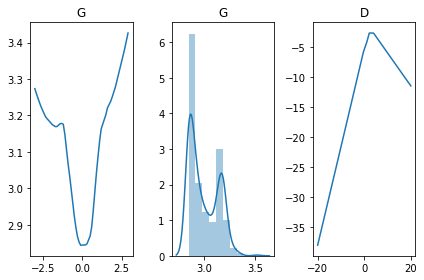

[Epoch 7704/10000] [D loss: -0.999610] [G loss: 2.619595]
[Epoch 7708/10000] [D loss: -0.999997] [G loss: 2.611515]
[Epoch 7712/10000] [D loss: -0.999251] [G loss: 2.593884]
[Epoch 7716/10000] [D loss: -0.999434] [G loss: 2.650193]
[Epoch 7720/10000] [D loss: -0.999626] [G loss: 2.615992]
[Epoch 7724/10000] [D loss: -0.999876] [G loss: 2.602015]
[Epoch 7728/10000] [D loss: -0.999361] [G loss: 2.606412]
[Epoch 7732/10000] [D loss: -0.999645] [G loss: 2.599236]
[Epoch 7736/10000] [D loss: -0.999683] [G loss: 2.596000]
[Epoch 7740/10000] [D loss: -0.999899] [G loss: 2.590796]
[Epoch 7744/10000] [D loss: -0.999179] [G loss: 2.679302]
[Epoch 7748/10000] [D loss: -0.999040] [G loss: 2.587589]
[Epoch 7752/10000] [D loss: -0.999851] [G loss: 2.609060]
[Epoch 7756/10000] [D loss: -0.999483] [G loss: 2.632662]
[Epoch 7760/10000] [D loss: -0.999370] [G loss: 2.667479]
[Epoch 7764/10000] [D loss: -0.999684] [G loss: 2.646856]
[Epoch 7768/10000] [D loss: -0.999721] [G loss: 2.631292]
[Epoch 7772/10

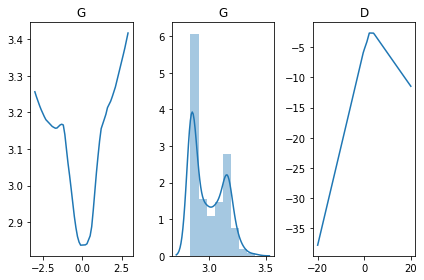

[Epoch 7804/10000] [D loss: -0.999185] [G loss: 2.631195]
[Epoch 7808/10000] [D loss: -0.999830] [G loss: 2.623779]
[Epoch 7812/10000] [D loss: -0.999396] [G loss: 2.634160]
[Epoch 7816/10000] [D loss: -0.999784] [G loss: 2.634215]
[Epoch 7820/10000] [D loss: -0.999736] [G loss: 2.592054]
[Epoch 7824/10000] [D loss: -0.999652] [G loss: 2.591920]
[Epoch 7828/10000] [D loss: -0.999969] [G loss: 2.618638]
[Epoch 7832/10000] [D loss: -0.999349] [G loss: 2.595912]
[Epoch 7836/10000] [D loss: -0.999557] [G loss: 2.555757]
[Epoch 7840/10000] [D loss: -0.999736] [G loss: 2.587291]
[Epoch 7844/10000] [D loss: -0.999509] [G loss: 2.593328]
[Epoch 7848/10000] [D loss: -0.999598] [G loss: 2.625495]
[Epoch 7852/10000] [D loss: -0.999964] [G loss: 2.594592]
[Epoch 7856/10000] [D loss: -0.999582] [G loss: 2.618947]
[Epoch 7860/10000] [D loss: -0.999960] [G loss: 2.615633]
[Epoch 7864/10000] [D loss: -0.999894] [G loss: 2.617934]
[Epoch 7868/10000] [D loss: -0.999291] [G loss: 2.627455]
[Epoch 7872/10

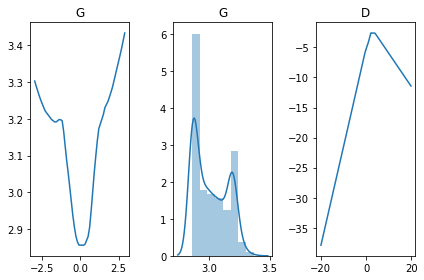

[Epoch 7904/10000] [D loss: -0.999933] [G loss: 2.594202]
[Epoch 7908/10000] [D loss: -0.999972] [G loss: 2.571872]
[Epoch 7912/10000] [D loss: -0.999675] [G loss: 2.659638]
[Epoch 7916/10000] [D loss: -0.999765] [G loss: 2.629149]
[Epoch 7920/10000] [D loss: -0.999764] [G loss: 2.641480]
[Epoch 7924/10000] [D loss: -0.999838] [G loss: 2.618260]
[Epoch 7928/10000] [D loss: -0.998894] [G loss: 2.652821]
[Epoch 7932/10000] [D loss: -0.999348] [G loss: 2.625868]
[Epoch 7936/10000] [D loss: -0.999948] [G loss: 2.564072]
[Epoch 7940/10000] [D loss: -0.999448] [G loss: 2.667141]
[Epoch 7944/10000] [D loss: -0.999857] [G loss: 2.616440]
[Epoch 7948/10000] [D loss: -0.999605] [G loss: 2.598518]
[Epoch 7952/10000] [D loss: -0.999617] [G loss: 2.598295]
[Epoch 7956/10000] [D loss: -0.999852] [G loss: 2.593558]
[Epoch 7960/10000] [D loss: -0.999981] [G loss: 2.569760]
[Epoch 7964/10000] [D loss: -0.998957] [G loss: 2.645203]
[Epoch 7968/10000] [D loss: -0.999671] [G loss: 2.620452]
[Epoch 7972/10

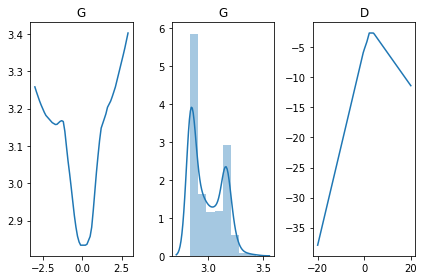

[Epoch 8004/10000] [D loss: -0.999288] [G loss: 2.584632]
[Epoch 8008/10000] [D loss: -0.999112] [G loss: 2.569900]
[Epoch 8012/10000] [D loss: -0.999399] [G loss: 2.614033]
[Epoch 8016/10000] [D loss: -0.999164] [G loss: 2.636661]
[Epoch 8020/10000] [D loss: -0.999610] [G loss: 2.606076]
[Epoch 8024/10000] [D loss: -0.999739] [G loss: 2.581830]
[Epoch 8028/10000] [D loss: -0.999603] [G loss: 2.599225]
[Epoch 8032/10000] [D loss: -0.999881] [G loss: 2.636777]
[Epoch 8036/10000] [D loss: -0.999306] [G loss: 2.580974]
[Epoch 8040/10000] [D loss: -0.999433] [G loss: 2.630180]
[Epoch 8044/10000] [D loss: -0.999444] [G loss: 2.582209]
[Epoch 8048/10000] [D loss: -0.999768] [G loss: 2.608784]
[Epoch 8052/10000] [D loss: -0.999610] [G loss: 2.602200]
[Epoch 8056/10000] [D loss: -0.999779] [G loss: 2.618060]
[Epoch 8060/10000] [D loss: -0.999918] [G loss: 2.592036]
[Epoch 8064/10000] [D loss: -0.999706] [G loss: 2.602778]
[Epoch 8068/10000] [D loss: -0.999426] [G loss: 2.597264]
[Epoch 8072/10

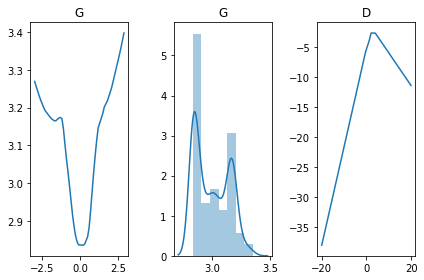

[Epoch 8104/10000] [D loss: -0.999338] [G loss: 2.608808]
[Epoch 8108/10000] [D loss: -0.999878] [G loss: 2.636317]
[Epoch 8112/10000] [D loss: -0.999723] [G loss: 2.586307]
[Epoch 8116/10000] [D loss: -0.999256] [G loss: 2.540849]
[Epoch 8120/10000] [D loss: -0.999171] [G loss: 2.604516]
[Epoch 8124/10000] [D loss: -0.999969] [G loss: 2.585639]
[Epoch 8128/10000] [D loss: -0.999407] [G loss: 2.598343]
[Epoch 8132/10000] [D loss: -0.999757] [G loss: 2.589514]
[Epoch 8136/10000] [D loss: -0.999411] [G loss: 2.580668]
[Epoch 8140/10000] [D loss: -0.999944] [G loss: 2.561551]
[Epoch 8144/10000] [D loss: -0.999406] [G loss: 2.632504]
[Epoch 8148/10000] [D loss: -0.999147] [G loss: 2.646561]
[Epoch 8152/10000] [D loss: -0.999145] [G loss: 2.568654]
[Epoch 8156/10000] [D loss: -0.999799] [G loss: 2.594489]
[Epoch 8160/10000] [D loss: -0.999225] [G loss: 2.604047]
[Epoch 8164/10000] [D loss: -0.999721] [G loss: 2.566083]
[Epoch 8168/10000] [D loss: -0.999682] [G loss: 2.620420]
[Epoch 8172/10

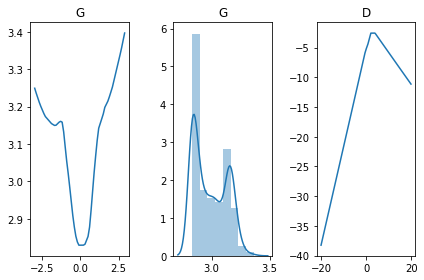

[Epoch 8204/10000] [D loss: -0.998855] [G loss: 2.577378]
[Epoch 8208/10000] [D loss: -0.999601] [G loss: 2.603217]
[Epoch 8212/10000] [D loss: -0.999969] [G loss: 2.633050]
[Epoch 8216/10000] [D loss: -0.999641] [G loss: 2.607400]
[Epoch 8220/10000] [D loss: -0.999781] [G loss: 2.604221]
[Epoch 8224/10000] [D loss: -0.999818] [G loss: 2.614345]
[Epoch 8228/10000] [D loss: -0.999796] [G loss: 2.572589]
[Epoch 8232/10000] [D loss: -0.999751] [G loss: 2.579250]
[Epoch 8236/10000] [D loss: -0.999359] [G loss: 2.597300]
[Epoch 8240/10000] [D loss: -0.999159] [G loss: 2.544965]
[Epoch 8244/10000] [D loss: -0.999760] [G loss: 2.604730]
[Epoch 8248/10000] [D loss: -0.999397] [G loss: 2.615203]
[Epoch 8252/10000] [D loss: -0.999158] [G loss: 2.584072]
[Epoch 8256/10000] [D loss: -0.999791] [G loss: 2.584540]
[Epoch 8260/10000] [D loss: -0.999482] [G loss: 2.539634]
[Epoch 8264/10000] [D loss: -0.999964] [G loss: 2.614787]
[Epoch 8268/10000] [D loss: -0.999961] [G loss: 2.611272]
[Epoch 8272/10

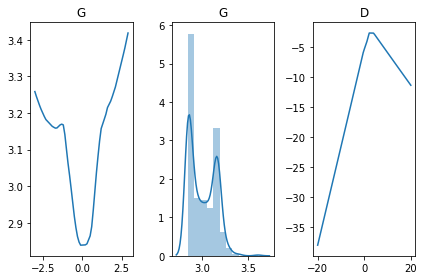

[Epoch 8304/10000] [D loss: -0.999182] [G loss: 2.618591]
[Epoch 8308/10000] [D loss: -0.999224] [G loss: 2.559624]
[Epoch 8312/10000] [D loss: -0.999848] [G loss: 2.571048]
[Epoch 8316/10000] [D loss: -0.999724] [G loss: 2.646246]
[Epoch 8320/10000] [D loss: -0.999928] [G loss: 2.610984]
[Epoch 8324/10000] [D loss: -0.999711] [G loss: 2.580000]
[Epoch 8328/10000] [D loss: -0.999829] [G loss: 2.588642]
[Epoch 8332/10000] [D loss: -0.999905] [G loss: 2.616685]
[Epoch 8336/10000] [D loss: -0.999563] [G loss: 2.568096]
[Epoch 8340/10000] [D loss: -0.999983] [G loss: 2.547618]
[Epoch 8344/10000] [D loss: -0.999730] [G loss: 2.600093]
[Epoch 8348/10000] [D loss: -0.999773] [G loss: 2.587192]
[Epoch 8352/10000] [D loss: -0.999732] [G loss: 2.591544]
[Epoch 8356/10000] [D loss: -0.999972] [G loss: 2.610242]
[Epoch 8360/10000] [D loss: -0.999669] [G loss: 2.607160]
[Epoch 8364/10000] [D loss: -0.999460] [G loss: 2.585810]
[Epoch 8368/10000] [D loss: -0.999920] [G loss: 2.586974]
[Epoch 8372/10

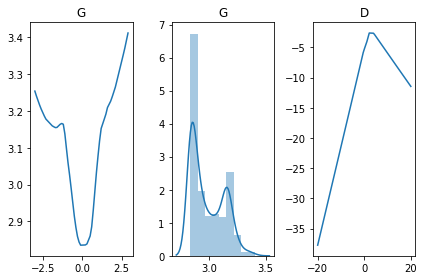

[Epoch 8404/10000] [D loss: -0.999372] [G loss: 2.608432]
[Epoch 8408/10000] [D loss: -0.999582] [G loss: 2.584527]
[Epoch 8412/10000] [D loss: -0.999523] [G loss: 2.575051]
[Epoch 8416/10000] [D loss: -0.999193] [G loss: 2.557138]
[Epoch 8420/10000] [D loss: -0.999958] [G loss: 2.562871]
[Epoch 8424/10000] [D loss: -0.999989] [G loss: 2.553299]
[Epoch 8428/10000] [D loss: -0.999749] [G loss: 2.564826]
[Epoch 8432/10000] [D loss: -0.999547] [G loss: 2.603529]
[Epoch 8436/10000] [D loss: -0.999831] [G loss: 2.555210]
[Epoch 8440/10000] [D loss: -0.999630] [G loss: 2.624785]
[Epoch 8444/10000] [D loss: -0.999961] [G loss: 2.614506]
[Epoch 8448/10000] [D loss: -0.999657] [G loss: 2.625378]
[Epoch 8452/10000] [D loss: -0.999922] [G loss: 2.566125]
[Epoch 8456/10000] [D loss: -0.999480] [G loss: 2.598464]
[Epoch 8460/10000] [D loss: -0.999836] [G loss: 2.609124]
[Epoch 8464/10000] [D loss: -0.999884] [G loss: 2.570244]
[Epoch 8468/10000] [D loss: -0.999562] [G loss: 2.578040]
[Epoch 8472/10

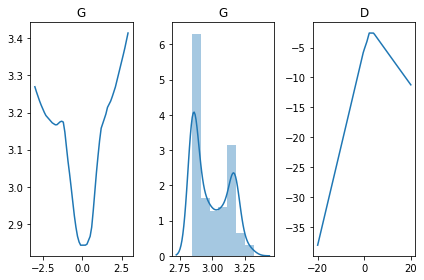

[Epoch 8504/10000] [D loss: -0.999684] [G loss: 2.571412]
[Epoch 8508/10000] [D loss: -0.999162] [G loss: 2.555751]
[Epoch 8512/10000] [D loss: -0.999467] [G loss: 2.587474]
[Epoch 8516/10000] [D loss: -0.999194] [G loss: 2.580639]
[Epoch 8520/10000] [D loss: -0.999561] [G loss: 2.568892]
[Epoch 8524/10000] [D loss: -0.999792] [G loss: 2.619127]
[Epoch 8528/10000] [D loss: -0.999816] [G loss: 2.587293]
[Epoch 8532/10000] [D loss: -0.999637] [G loss: 2.591272]
[Epoch 8536/10000] [D loss: -0.998951] [G loss: 2.656269]
[Epoch 8540/10000] [D loss: -0.999585] [G loss: 2.604266]
[Epoch 8544/10000] [D loss: -0.999428] [G loss: 2.591570]
[Epoch 8548/10000] [D loss: -0.999375] [G loss: 2.561035]
[Epoch 8552/10000] [D loss: -0.999876] [G loss: 2.600436]
[Epoch 8556/10000] [D loss: -0.999795] [G loss: 2.593120]
[Epoch 8560/10000] [D loss: -0.999615] [G loss: 2.599029]
[Epoch 8564/10000] [D loss: -0.999681] [G loss: 2.545043]
[Epoch 8568/10000] [D loss: -0.999873] [G loss: 2.594087]
[Epoch 8572/10

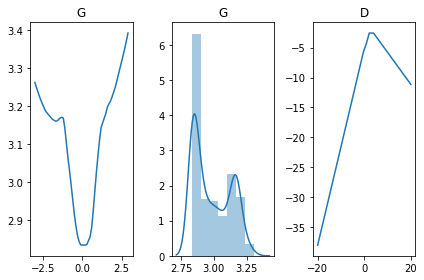

[Epoch 8604/10000] [D loss: -0.999947] [G loss: 2.622898]
[Epoch 8608/10000] [D loss: -0.999011] [G loss: 2.569166]
[Epoch 8612/10000] [D loss: -0.999581] [G loss: 2.567557]
[Epoch 8616/10000] [D loss: -0.999619] [G loss: 2.576802]
[Epoch 8620/10000] [D loss: -0.999758] [G loss: 2.605828]
[Epoch 8624/10000] [D loss: -0.999959] [G loss: 2.548753]
[Epoch 8628/10000] [D loss: -0.999702] [G loss: 2.585771]
[Epoch 8632/10000] [D loss: -0.999616] [G loss: 2.570305]
[Epoch 8636/10000] [D loss: -0.999813] [G loss: 2.594803]
[Epoch 8640/10000] [D loss: -0.999736] [G loss: 2.605967]
[Epoch 8644/10000] [D loss: -0.999977] [G loss: 2.599012]
[Epoch 8648/10000] [D loss: -0.999427] [G loss: 2.581985]
[Epoch 8652/10000] [D loss: -0.999729] [G loss: 2.609161]
[Epoch 8656/10000] [D loss: -0.999608] [G loss: 2.567468]
[Epoch 8660/10000] [D loss: -0.999968] [G loss: 2.580648]
[Epoch 8664/10000] [D loss: -0.999778] [G loss: 2.565511]
[Epoch 8668/10000] [D loss: -0.999668] [G loss: 2.588610]
[Epoch 8672/10

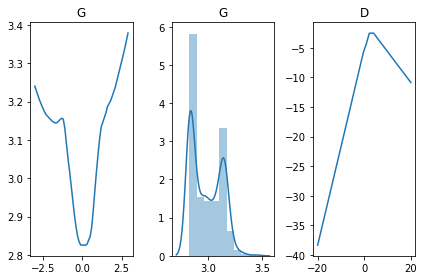

[Epoch 8704/10000] [D loss: -0.999584] [G loss: 2.596215]
[Epoch 8708/10000] [D loss: -0.999935] [G loss: 2.605036]
[Epoch 8712/10000] [D loss: -0.999310] [G loss: 2.566876]
[Epoch 8716/10000] [D loss: -0.998736] [G loss: 2.604671]
[Epoch 8720/10000] [D loss: -0.999553] [G loss: 2.591645]
[Epoch 8724/10000] [D loss: -0.999899] [G loss: 2.553058]
[Epoch 8728/10000] [D loss: -0.999511] [G loss: 2.563865]
[Epoch 8732/10000] [D loss: -0.999782] [G loss: 2.579726]
[Epoch 8736/10000] [D loss: -0.999997] [G loss: 2.593393]
[Epoch 8740/10000] [D loss: -0.999616] [G loss: 2.569958]
[Epoch 8744/10000] [D loss: -0.999349] [G loss: 2.523019]
[Epoch 8748/10000] [D loss: -0.998548] [G loss: 2.611686]
[Epoch 8752/10000] [D loss: -0.999710] [G loss: 2.566893]
[Epoch 8756/10000] [D loss: -0.999983] [G loss: 2.627824]
[Epoch 8760/10000] [D loss: -0.999922] [G loss: 2.595501]
[Epoch 8764/10000] [D loss: -0.999936] [G loss: 2.628847]
[Epoch 8768/10000] [D loss: -0.999578] [G loss: 2.577086]
[Epoch 8772/10

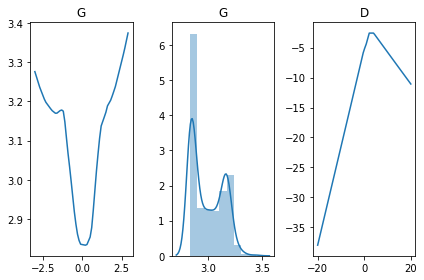

[Epoch 8804/10000] [D loss: -0.999848] [G loss: 2.546793]
[Epoch 8808/10000] [D loss: -0.999951] [G loss: 2.538362]
[Epoch 8812/10000] [D loss: -0.999954] [G loss: 2.554698]
[Epoch 8816/10000] [D loss: -0.999411] [G loss: 2.591242]
[Epoch 8820/10000] [D loss: -0.999834] [G loss: 2.588634]
[Epoch 8824/10000] [D loss: -0.999960] [G loss: 2.538368]
[Epoch 8828/10000] [D loss: -0.999766] [G loss: 2.574414]
[Epoch 8832/10000] [D loss: -0.999181] [G loss: 2.609304]
[Epoch 8836/10000] [D loss: -0.999671] [G loss: 2.605920]
[Epoch 8840/10000] [D loss: -0.999552] [G loss: 2.589964]
[Epoch 8844/10000] [D loss: -0.999451] [G loss: 2.564032]
[Epoch 8848/10000] [D loss: -0.999502] [G loss: 2.598490]
[Epoch 8852/10000] [D loss: -0.999668] [G loss: 2.603421]
[Epoch 8856/10000] [D loss: -0.999953] [G loss: 2.546581]
[Epoch 8860/10000] [D loss: -0.999513] [G loss: 2.561388]
[Epoch 8864/10000] [D loss: -0.999554] [G loss: 2.558184]
[Epoch 8868/10000] [D loss: -0.999222] [G loss: 2.595404]
[Epoch 8872/10

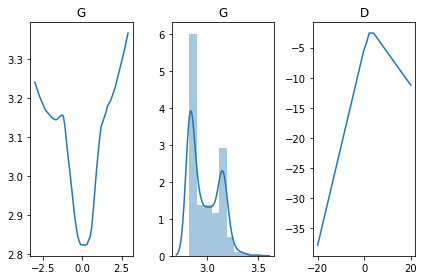

[Epoch 8904/10000] [D loss: -0.999886] [G loss: 2.596676]
[Epoch 8908/10000] [D loss: -0.999989] [G loss: 2.580178]
[Epoch 8912/10000] [D loss: -0.999945] [G loss: 2.539211]
[Epoch 8916/10000] [D loss: -0.999473] [G loss: 2.528246]
[Epoch 8920/10000] [D loss: -0.999474] [G loss: 2.566040]
[Epoch 8924/10000] [D loss: -0.999269] [G loss: 2.537662]
[Epoch 8928/10000] [D loss: -0.999994] [G loss: 2.612342]
[Epoch 8932/10000] [D loss: -0.999166] [G loss: 2.530133]
[Epoch 8936/10000] [D loss: -0.999671] [G loss: 2.555451]
[Epoch 8940/10000] [D loss: -0.999985] [G loss: 2.596651]
[Epoch 8944/10000] [D loss: -0.999769] [G loss: 2.591213]
[Epoch 8948/10000] [D loss: -0.999737] [G loss: 2.523851]
[Epoch 8952/10000] [D loss: -0.999292] [G loss: 2.636316]
[Epoch 8956/10000] [D loss: -0.999639] [G loss: 2.568863]
[Epoch 8960/10000] [D loss: -0.999963] [G loss: 2.528826]
[Epoch 8964/10000] [D loss: -0.999944] [G loss: 2.589039]
[Epoch 8968/10000] [D loss: -0.999880] [G loss: 2.538642]
[Epoch 8972/10

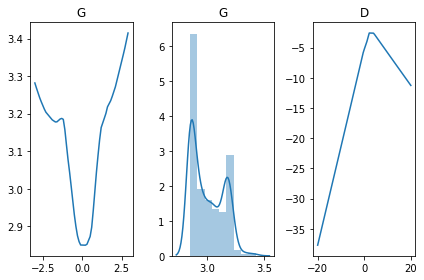

[Epoch 9004/10000] [D loss: -0.999859] [G loss: 2.601220]
[Epoch 9008/10000] [D loss: -0.999996] [G loss: 2.599659]
[Epoch 9012/10000] [D loss: -0.999391] [G loss: 2.558120]
[Epoch 9016/10000] [D loss: -0.999758] [G loss: 2.567904]
[Epoch 9020/10000] [D loss: -0.999447] [G loss: 2.567334]
[Epoch 9024/10000] [D loss: -0.999256] [G loss: 2.533159]
[Epoch 9028/10000] [D loss: -0.999447] [G loss: 2.568265]
[Epoch 9032/10000] [D loss: -0.999137] [G loss: 2.552182]
[Epoch 9036/10000] [D loss: -0.999573] [G loss: 2.621822]
[Epoch 9040/10000] [D loss: -0.999768] [G loss: 2.606174]
[Epoch 9044/10000] [D loss: -0.999440] [G loss: 2.581421]
[Epoch 9048/10000] [D loss: -0.999924] [G loss: 2.582237]
[Epoch 9052/10000] [D loss: -0.999996] [G loss: 2.605490]
[Epoch 9056/10000] [D loss: -0.999021] [G loss: 2.484269]
[Epoch 9060/10000] [D loss: -0.999842] [G loss: 2.563261]
[Epoch 9064/10000] [D loss: -0.999811] [G loss: 2.545236]
[Epoch 9068/10000] [D loss: -0.999594] [G loss: 2.544010]
[Epoch 9072/10

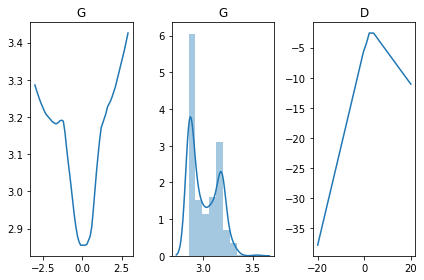

[Epoch 9104/10000] [D loss: -0.999771] [G loss: 2.543198]
[Epoch 9108/10000] [D loss: -0.999059] [G loss: 2.599924]
[Epoch 9112/10000] [D loss: -0.999752] [G loss: 2.540666]
[Epoch 9116/10000] [D loss: -0.999112] [G loss: 2.611683]
[Epoch 9120/10000] [D loss: -0.999920] [G loss: 2.614569]
[Epoch 9124/10000] [D loss: -0.999480] [G loss: 2.574840]
[Epoch 9128/10000] [D loss: -0.999420] [G loss: 2.586748]
[Epoch 9132/10000] [D loss: -0.999549] [G loss: 2.573138]
[Epoch 9136/10000] [D loss: -0.999498] [G loss: 2.591993]
[Epoch 9140/10000] [D loss: -0.999748] [G loss: 2.556085]
[Epoch 9144/10000] [D loss: -0.999967] [G loss: 2.526238]
[Epoch 9148/10000] [D loss: -0.999007] [G loss: 2.586644]
[Epoch 9152/10000] [D loss: -0.999442] [G loss: 2.566791]
[Epoch 9156/10000] [D loss: -0.999661] [G loss: 2.544065]
[Epoch 9160/10000] [D loss: -0.999951] [G loss: 2.580552]
[Epoch 9164/10000] [D loss: -0.999760] [G loss: 2.557428]
[Epoch 9168/10000] [D loss: -0.999423] [G loss: 2.521319]
[Epoch 9172/10

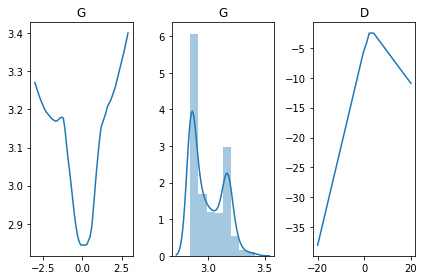

[Epoch 9204/10000] [D loss: -0.999582] [G loss: 2.553929]
[Epoch 9208/10000] [D loss: -0.999913] [G loss: 2.565593]
[Epoch 9212/10000] [D loss: -0.999346] [G loss: 2.589906]
[Epoch 9216/10000] [D loss: -1.000000] [G loss: 2.533710]
[Epoch 9220/10000] [D loss: -0.999389] [G loss: 2.591951]
[Epoch 9224/10000] [D loss: -0.999407] [G loss: 2.548318]
[Epoch 9228/10000] [D loss: -0.999895] [G loss: 2.590703]
[Epoch 9232/10000] [D loss: -0.999905] [G loss: 2.546980]
[Epoch 9236/10000] [D loss: -0.998567] [G loss: 2.543964]
[Epoch 9240/10000] [D loss: -0.999516] [G loss: 2.575240]
[Epoch 9244/10000] [D loss: -0.999875] [G loss: 2.586439]
[Epoch 9248/10000] [D loss: -0.999958] [G loss: 2.567478]
[Epoch 9252/10000] [D loss: -0.999798] [G loss: 2.574881]
[Epoch 9256/10000] [D loss: -0.999158] [G loss: 2.549875]
[Epoch 9260/10000] [D loss: -0.999271] [G loss: 2.564144]
[Epoch 9264/10000] [D loss: -0.999757] [G loss: 2.587052]
[Epoch 9268/10000] [D loss: -0.999623] [G loss: 2.574443]
[Epoch 9272/10

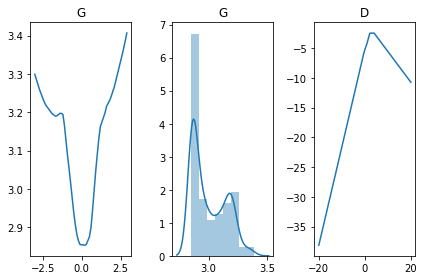

[Epoch 9304/10000] [D loss: -0.999997] [G loss: 2.592151]
[Epoch 9308/10000] [D loss: -0.999894] [G loss: 2.610975]
[Epoch 9312/10000] [D loss: -0.998805] [G loss: 2.540078]
[Epoch 9316/10000] [D loss: -0.999981] [G loss: 2.516450]
[Epoch 9320/10000] [D loss: -0.999863] [G loss: 2.533323]
[Epoch 9324/10000] [D loss: -0.999774] [G loss: 2.572608]
[Epoch 9328/10000] [D loss: -0.999752] [G loss: 2.594113]
[Epoch 9332/10000] [D loss: -0.999511] [G loss: 2.565160]
[Epoch 9336/10000] [D loss: -0.999545] [G loss: 2.575236]
[Epoch 9340/10000] [D loss: -0.999591] [G loss: 2.601410]
[Epoch 9344/10000] [D loss: -0.999270] [G loss: 2.566290]
[Epoch 9348/10000] [D loss: -0.999788] [G loss: 2.571893]
[Epoch 9352/10000] [D loss: -0.999937] [G loss: 2.562188]
[Epoch 9356/10000] [D loss: -0.999703] [G loss: 2.557030]
[Epoch 9360/10000] [D loss: -0.999578] [G loss: 2.527456]
[Epoch 9364/10000] [D loss: -0.999642] [G loss: 2.577464]
[Epoch 9368/10000] [D loss: -0.999489] [G loss: 2.563573]
[Epoch 9372/10

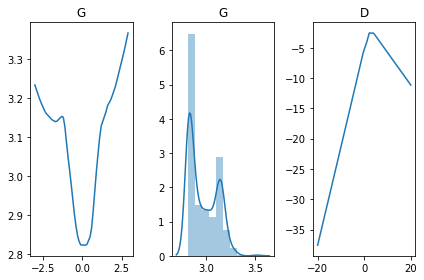

[Epoch 9404/10000] [D loss: -0.999913] [G loss: 2.549778]
[Epoch 9408/10000] [D loss: -0.999623] [G loss: 2.539867]
[Epoch 9412/10000] [D loss: -0.999759] [G loss: 2.547309]
[Epoch 9416/10000] [D loss: -0.999816] [G loss: 2.537608]
[Epoch 9420/10000] [D loss: -0.999613] [G loss: 2.547287]
[Epoch 9424/10000] [D loss: -0.999540] [G loss: 2.513883]
[Epoch 9428/10000] [D loss: -0.999818] [G loss: 2.553300]
[Epoch 9432/10000] [D loss: -0.999051] [G loss: 2.510162]
[Epoch 9436/10000] [D loss: -0.998971] [G loss: 2.579818]
[Epoch 9440/10000] [D loss: -0.999931] [G loss: 2.581748]
[Epoch 9444/10000] [D loss: -0.999941] [G loss: 2.606416]
[Epoch 9448/10000] [D loss: -0.999934] [G loss: 2.522541]
[Epoch 9452/10000] [D loss: -0.999016] [G loss: 2.593589]
[Epoch 9456/10000] [D loss: -0.999793] [G loss: 2.551287]
[Epoch 9460/10000] [D loss: -0.999491] [G loss: 2.499867]
[Epoch 9464/10000] [D loss: -0.999812] [G loss: 2.522330]
[Epoch 9468/10000] [D loss: -0.999408] [G loss: 2.559556]
[Epoch 9472/10

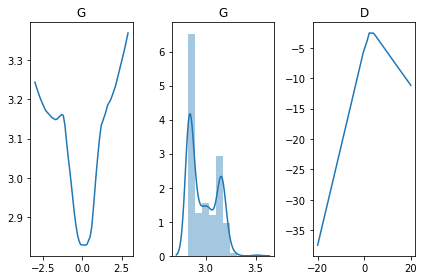

[Epoch 9504/10000] [D loss: -0.999067] [G loss: 2.520743]
[Epoch 9508/10000] [D loss: -0.999977] [G loss: 2.545588]
[Epoch 9512/10000] [D loss: -0.999173] [G loss: 2.540962]
[Epoch 9516/10000] [D loss: -0.999559] [G loss: 2.532812]
[Epoch 9520/10000] [D loss: -0.999978] [G loss: 2.511910]
[Epoch 9524/10000] [D loss: -0.999331] [G loss: 2.596713]
[Epoch 9528/10000] [D loss: -0.999926] [G loss: 2.588783]
[Epoch 9532/10000] [D loss: -0.999356] [G loss: 2.542283]
[Epoch 9536/10000] [D loss: -0.999677] [G loss: 2.519469]
[Epoch 9540/10000] [D loss: -0.999918] [G loss: 2.500205]
[Epoch 9544/10000] [D loss: -0.999572] [G loss: 2.572003]
[Epoch 9548/10000] [D loss: -0.999686] [G loss: 2.530297]
[Epoch 9552/10000] [D loss: -0.999551] [G loss: 2.548537]
[Epoch 9556/10000] [D loss: -0.999942] [G loss: 2.590204]
[Epoch 9560/10000] [D loss: -0.999824] [G loss: 2.548784]
[Epoch 9564/10000] [D loss: -0.999801] [G loss: 2.551136]
[Epoch 9568/10000] [D loss: -0.999687] [G loss: 2.545326]
[Epoch 9572/10

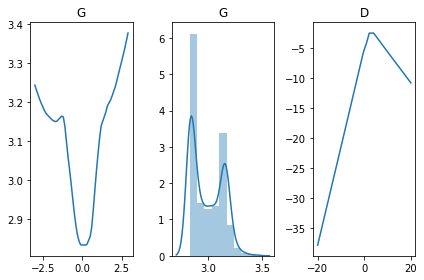

[Epoch 9604/10000] [D loss: -0.999894] [G loss: 2.540908]
[Epoch 9608/10000] [D loss: -0.999965] [G loss: 2.582496]
[Epoch 9612/10000] [D loss: -0.999484] [G loss: 2.533770]
[Epoch 9616/10000] [D loss: -0.999969] [G loss: 2.535594]
[Epoch 9620/10000] [D loss: -0.999719] [G loss: 2.571719]
[Epoch 9624/10000] [D loss: -0.999550] [G loss: 2.530963]
[Epoch 9628/10000] [D loss: -0.999039] [G loss: 2.501223]
[Epoch 9632/10000] [D loss: -0.999168] [G loss: 2.525640]
[Epoch 9636/10000] [D loss: -0.999655] [G loss: 2.520426]
[Epoch 9640/10000] [D loss: -0.999520] [G loss: 2.562212]
[Epoch 9644/10000] [D loss: -0.999496] [G loss: 2.577698]
[Epoch 9648/10000] [D loss: -0.999731] [G loss: 2.575089]
[Epoch 9652/10000] [D loss: -0.999707] [G loss: 2.542780]
[Epoch 9656/10000] [D loss: -0.999417] [G loss: 2.532391]
[Epoch 9660/10000] [D loss: -0.999476] [G loss: 2.568537]
[Epoch 9664/10000] [D loss: -0.999476] [G loss: 2.570232]
[Epoch 9668/10000] [D loss: -0.999771] [G loss: 2.575350]
[Epoch 9672/10

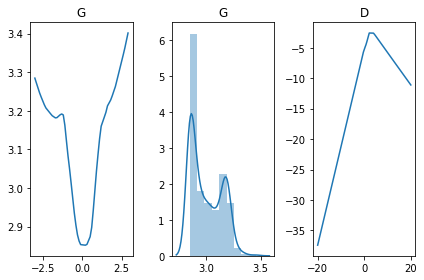

[Epoch 9704/10000] [D loss: -0.999723] [G loss: 2.521890]
[Epoch 9708/10000] [D loss: -0.999683] [G loss: 2.535244]
[Epoch 9712/10000] [D loss: -0.999356] [G loss: 2.569520]
[Epoch 9716/10000] [D loss: -0.999798] [G loss: 2.512384]
[Epoch 9720/10000] [D loss: -0.999641] [G loss: 2.524159]
[Epoch 9724/10000] [D loss: -0.999882] [G loss: 2.538637]
[Epoch 9728/10000] [D loss: -0.999962] [G loss: 2.539602]
[Epoch 9732/10000] [D loss: -0.999689] [G loss: 2.532425]
[Epoch 9736/10000] [D loss: -0.999999] [G loss: 2.534433]
[Epoch 9740/10000] [D loss: -0.999249] [G loss: 2.557034]
[Epoch 9744/10000] [D loss: -0.999966] [G loss: 2.533489]
[Epoch 9748/10000] [D loss: -1.000178] [G loss: 2.618362]
[Epoch 9752/10000] [D loss: -0.999818] [G loss: 2.548102]
[Epoch 9756/10000] [D loss: -0.999905] [G loss: 2.533814]
[Epoch 9760/10000] [D loss: -0.999733] [G loss: 2.535374]
[Epoch 9764/10000] [D loss: -0.999947] [G loss: 2.584262]
[Epoch 9768/10000] [D loss: -0.999846] [G loss: 2.561621]
[Epoch 9772/10

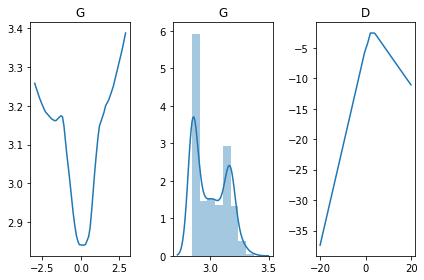

[Epoch 9804/10000] [D loss: -0.999520] [G loss: 2.545997]
[Epoch 9808/10000] [D loss: -0.999950] [G loss: 2.579117]
[Epoch 9812/10000] [D loss: -0.999783] [G loss: 2.508160]
[Epoch 9816/10000] [D loss: -0.999712] [G loss: 2.540275]
[Epoch 9820/10000] [D loss: -0.999786] [G loss: 2.551267]
[Epoch 9824/10000] [D loss: -0.999844] [G loss: 2.548007]
[Epoch 9828/10000] [D loss: -0.999766] [G loss: 2.525140]
[Epoch 9832/10000] [D loss: -0.999652] [G loss: 2.513898]
[Epoch 9836/10000] [D loss: -0.999797] [G loss: 2.560666]
[Epoch 9840/10000] [D loss: -0.999744] [G loss: 2.536417]
[Epoch 9844/10000] [D loss: -0.999356] [G loss: 2.496135]
[Epoch 9848/10000] [D loss: -0.999222] [G loss: 2.512582]
[Epoch 9852/10000] [D loss: -0.999880] [G loss: 2.514303]
[Epoch 9856/10000] [D loss: -0.999413] [G loss: 2.614866]
[Epoch 9860/10000] [D loss: -0.999695] [G loss: 2.559858]
[Epoch 9864/10000] [D loss: -0.999115] [G loss: 2.536167]
[Epoch 9868/10000] [D loss: -0.999973] [G loss: 2.497370]
[Epoch 9872/10

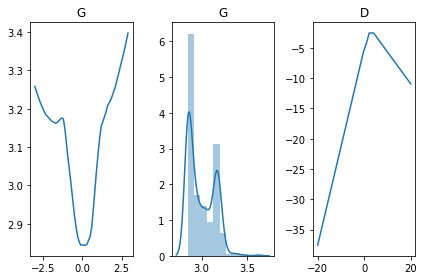

[Epoch 9904/10000] [D loss: -0.999822] [G loss: 2.586730]
[Epoch 9908/10000] [D loss: -0.999697] [G loss: 2.547771]
[Epoch 9912/10000] [D loss: -0.999525] [G loss: 2.510654]
[Epoch 9916/10000] [D loss: -0.999921] [G loss: 2.574351]
[Epoch 9920/10000] [D loss: -0.999036] [G loss: 2.504492]
[Epoch 9924/10000] [D loss: -0.999872] [G loss: 2.534103]
[Epoch 9928/10000] [D loss: -0.999581] [G loss: 2.523501]
[Epoch 9932/10000] [D loss: -0.999647] [G loss: 2.516004]
[Epoch 9936/10000] [D loss: -0.999787] [G loss: 2.543676]
[Epoch 9940/10000] [D loss: -0.999829] [G loss: 2.546178]
[Epoch 9944/10000] [D loss: -0.999894] [G loss: 2.544225]
[Epoch 9948/10000] [D loss: -0.999917] [G loss: 2.578933]
[Epoch 9952/10000] [D loss: -0.999512] [G loss: 2.521254]
[Epoch 9956/10000] [D loss: -0.999830] [G loss: 2.488448]
[Epoch 9960/10000] [D loss: -0.999997] [G loss: 2.579695]
[Epoch 9964/10000] [D loss: -0.999646] [G loss: 2.540669]
[Epoch 9968/10000] [D loss: -0.999539] [G loss: 2.508337]
[Epoch 9972/10

In [31]:
# ----------
#  Training
# ----------

n_epochs=10000

n_critic=4

lambda_gp=1.

for epoch in range(n_epochs):

    # Configure input
    real_imgs =m.sample([500]).to(device)

    # ---------------------
    #  Train Discriminator
    # ---------------------

    optimizer_D.zero_grad()

    # Sample noise as generator input
    z = Tensor(np.random.normal(0, 1, (real_imgs.shape[0], lat_dim)))

    # Generate a batch of images
    fake_imgs = generator(z)

    # Real images
    real_validity = discriminator(real_imgs)
    # Fake images
    fake_validity = discriminator(fake_imgs)
    # Gradient penalty
    gradient_penalty = compute_gradient_penalty(discriminator, real_imgs.data, fake_imgs.data)
    # Adversarial loss
    d_loss = -torch.mean(real_validity) + torch.mean(fake_validity)+lambda_gp * gradient_penalty

    d_loss.backward()
    optimizer_D.step()

    optimizer_G.zero_grad()

    # Train the generator every n_critic steps
    if epoch % n_critic == 0:

        # -----------------
        #  Train Generator
        # -----------------
        
        # Sample noise as generator input
        z = Tensor(np.random.normal(0, 1, (real_imgs.shape[0], lat_dim)))
        
        # Generate a batch of images
        fake_imgs = generator(z)
        # Loss measures generator's ability to fool the discriminator
        # Train on fake images
        fake_validity = discriminator(fake_imgs)
        g_loss = -torch.mean(fake_validity)

        g_loss.backward()
        optimizer_G.step()

        print(
            "[Epoch %d/%d] [D loss: %f] [G loss: %f]"
            % (epoch, n_epochs, d_loss.item(), g_loss.item())
            )

    if epoch % 100 == 0:
        viewGAN(discriminator, generator)
    

    

In [14]:
z = Tensor(np.random.normal(0, 1, (500, lat_dim)))
fake_data=generator(z).detach().cpu()

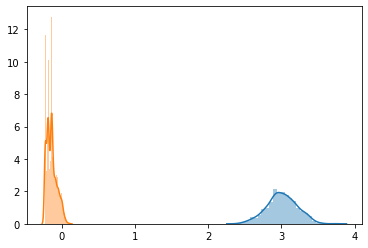

In [36]:
fig, ax= plt.subplots()

sns.distplot(real_data.cpu(), ax=ax)

z = Tensor(np.random.normal(0, 1, (5000, lat_dim)))
fake_data=generator(z).detach().cpu()
sns.distplot(fake_data, ax=ax)

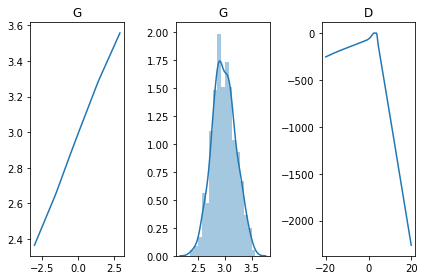

In [16]:
viewGAN(discriminator, generator)